# Name: Tan Xuan Inn, Danzel
# Admin Number: 1909423
# Class: EL/EP0302/FT/01
# Issue/Title: Crime and Safety in Singapore

Singapore is know to be one of the safest countries in the world. Consistently ranking top in the world for safety (https://worldpopulationreview.com/country-rankings/safest-countries-in-the-world) and having the lowest crime rates in the world, the key attribute of safety and sense of security makes it attractive for investors, businesses, and families to grow and prosper. However, low crime does not mean no crime, and much of the recent advancements in technology has allowed criminals to stay anonymous behind the curtains of the cyber space. In this investigation, I plan to learn and uncover insights on crime in Singapore.

To that end, these are some questions that I want answered through data analysis:

    1. What is the trend of the crime cases recorded in Singapore?
    2. Which crime is committed the most?
    3. What are the various crimes in Singapore and their trend over the years?
    4. Which age and citizenship groups are arrested the most in Singapore?
    5. What is the correlation between the overall crime rate and the overall crime cases reported in Singapore?
    6. What is the trend of the total arrested in Singapore and the total Crime Cases Recorded? Is there a relation between the two?

These are the selected datasets I have chosen:

<a href="https://data.gov.sg/dataset/overall-crime-cases-crime-rate?resource_id=124af3cd-08d5-405a-9c83-02f0ad16cb5f">Overall Crime Cases and Crime Rate</a>

<a href="https://data.gov.sg/dataset/islandwide-persons-arrested-for-selected-major-offences?resource_id=57bed499-17a8-4994-b18f-71f774525a61">Persons Arrested for Selected Major Offences</a>

<a href="https://data.gov.sg/dataset/total-persons-locals-and-foreigners-arrested">Total Persons (locals and foreigners) Arrested</a>


### Importation of Python Libraries

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(15,10)})

import numpy as np

### Section 1.1: Persons Arrested for Selected Major Offences

In [2]:
df = pd.read_csv('./data/persons-arrested-for-selected-major-offences-by-age-group.csv', header=0)
df = df.rename(columns={"year":"Year", "level_1":"Offence_Type_and_Gender", "level_2":"Age_Group", "value":"Count"})
print('Dataset:')
display(df)
print(f'Shape of Dataset: {df.shape}')

ageGroups = df.Age_Group.unique()
print('\nAge Groups of Persons Arrested:')
print(', '.join(ageGroups))

print('\nTypes of Major Offences:')
uniqueOffence = df.Offence_Type_and_Gender.str
uniqueOffence = ((uniqueOffence.extract('Total Persons Arrested For (\w.+)')).dropna())[0].unique()
print('\n'.join(uniqueOffence))

print('\nYear Range of Dataset:')
print(f'Years {df.Year.min()} to {df.Year.max()}')

Dataset:


,Year,Offence_Type_and_Gender,Age_Group,Count
0,2011,Total Persons Arrested For Murder,Above 21 Years Old,18
1,2011,Total Persons Arrested For Murder,21 Years Old And Below,12
2,2011,Total Persons Arrested For Murder,Youths (7 To 19 Years Old),9
3,2011,Male Arrested For Murder,Above 21 Years Old,17
4,2011,Male Arrested For Murder,21 Years Old And Below,11
...,...,...,...,...
805,2019,Male Arrested For Cheating & Related,21 Years Old And Below,214
806,2019,Male Arrested For Cheating & Related,Youths (7 To 19 Years Old),141
807,2019,Female Arrested For Cheating & Related,Above 21 Years Old,668
808,2019,Female Arrested For Cheating & Related,21 Years Old And Below,118


Shape of Dataset: (810, 4)

Age Groups of Persons Arrested:
Above 21 Years Old, 21 Years Old And Below, Youths (7 To 19 Years Old)

Types of Major Offences:
Murder
Rape
Outrage Of Modesty
Robbery
Housebreaking
Theft Of Motor Vehicle
Snatch Theft
Rioting
Serious Hurt
Cheating & Related

Year Range of Dataset:
Years 2011 to 2019


In Section 1.2 onwards, I will be analysing the data from the specific Major Offences committed, as the data is too comprehensive to be stored on one cell (and it also provides for easier reading)

### Section 1.2: Analysis of Data Subset - Persons Arrested For Outrage of Modesty

In [3]:
om = (df.groupby('Offence_Type_and_Gender').get_group('Total Persons Arrested For Outrage Of Modesty'))
maleSubset = (df.groupby('Offence_Type_and_Gender').get_group('Male Arrested For Outrage Of Modesty'))
femaleSubset = (df.groupby('Offence_Type_and_Gender').get_group('Female Arrested For Outrage Of Modesty'))

print('Total persons arrested for Outrage of Modesty (head and tail)')
display((om.head(3)).append(om.tail(3)))

print('---Total Arrested for Outrage of Modesty (2011-2019) Statistics---')
print('---Average---')
for group in ageGroups:
    total = (om.groupby('Age_Group')).get_group(group)
    print(f'{group}: {round(total.Count.mean(), 3)} arrests')

print('---Other Statistics---')
print(f'Most amount of arrests made: {(om.groupby("Year").sum().max())[0]} in {(om.groupby("Year").sum().idxmax())[0]}')
print(f'Least amount of arrests made: {(om.groupby("Year").sum().min())[0]} in {(om.groupby("Year").sum().idxmin())[0]}')
pctChange = (om.groupby("Year").sum()).pct_change()
print(f'Highest increase was from the year {pctChange.idxmax().Count} with a {round(pctChange.max().Count, 3)}% increase')
print(f'Highest decrease was from the year {pctChange.idxmin().Count} with a {round(pctChange.min().Count, 3)}% decrease')

print('\nMales arrested for Outrage of Modesty (head and tail)')
display((maleSubset.head(3)).append(maleSubset.tail(3)))

print('---Male Arrested for Outrage of Modesty (2011-2019) Statistics---')
print('---Average---')
for group in ageGroups:
    total = (maleSubset.groupby('Age_Group')).get_group(group)
    print(f'{group}: {round(total.Count.mean(), 3)} arrests')
    
print('---Other Statistics---')
print(f'Most amount of arrests made: {(maleSubset.groupby("Year").sum().max())[0]} in {(maleSubset.groupby("Year").sum().idxmax())[0]}')
print(f'Least amount of arrests made: {(maleSubset.groupby("Year").sum().min())[0]} in {(maleSubset.groupby("Year").sum().idxmin())[0]}')
pctChange = (maleSubset.groupby("Year").sum()).pct_change()
print(f'Highest increase was from the year {pctChange.idxmax().Count} with a {round(pctChange.max().Count, 3)}% increase')
print(f'Highest decrease was from the year {pctChange.idxmin().Count} with a {round(pctChange.min().Count, 3)}% decrease')

print('\nFemales persons arrested for Outrage of Modesty (head and tail)')
display((femaleSubset.head(3)).append(femaleSubset.tail(3)))

print('---Female Arrested for Outrage of Modesty (2011-2019) Statistics---')
print('---Average---')
for group in ageGroups:
    total = (femaleSubset.groupby('Age_Group')).get_group(group)
    print(f'{group}: {round(total.Count.mean(), 3)} arrests')

print('---Other Statistics---')
print(f'Most amount of arrests made: {(femaleSubset.groupby("Year").sum().max())[0]} in {(femaleSubset.groupby("Year").sum().idxmax())[0]}')
print(f'Least amount of arrests made: {(femaleSubset.groupby("Year").sum().min())[0]} in {(femaleSubset.groupby("Year").sum().idxmin())[0]}')
pctChange = (femaleSubset.groupby("Year").sum()).pct_change()
print(f'Highest increase was from the year {pctChange.idxmax().Count} with a {round(pctChange.max().Count, 3)}% increase')
print(f'Highest decrease was from the year {pctChange.idxmin().Count} with a {round(pctChange.min().Count, 3)}% decrease')

Total persons arrested for Outrage of Modesty (head and tail)


,Year,Offence_Type_and_Gender,Age_Group,Count
18,2011,Total Persons Arrested For Outrage Of Modesty,Above 21 Years Old,685
19,2011,Total Persons Arrested For Outrage Of Modesty,21 Years Old And Below,118
20,2011,Total Persons Arrested For Outrage Of Modesty,Youths (7 To 19 Years Old),81
738,2019,Total Persons Arrested For Outrage Of Modesty,Above 21 Years Old,977
739,2019,Total Persons Arrested For Outrage Of Modesty,21 Years Old And Below,100
740,2019,Total Persons Arrested For Outrage Of Modesty,Youths (7 To 19 Years Old),78


---Total Arrested for Outrage of Modesty (2011-2019) Statistics---
---Average---
Above 21 Years Old: 788.222 arrests
21 Years Old And Below: 117.333 arrests
Youths (7 To 19 Years Old): 86.333 arrests
---Other Statistics---
Most amount of arrests made: 1225 in 2018
Least amount of arrests made: 861 in 2013
Highest increase was from the year 2018 with a 0.166% increase
Highest decrease was from the year 2019 with a -0.057% decrease

Males arrested for Outrage of Modesty (head and tail)


,Year,Offence_Type_and_Gender,Age_Group,Count
21,2011,Male Arrested For Outrage Of Modesty,Above 21 Years Old,681
22,2011,Male Arrested For Outrage Of Modesty,21 Years Old And Below,115
23,2011,Male Arrested For Outrage Of Modesty,Youths (7 To 19 Years Old),79
741,2019,Male Arrested For Outrage Of Modesty,Above 21 Years Old,967
742,2019,Male Arrested For Outrage Of Modesty,21 Years Old And Below,99
743,2019,Male Arrested For Outrage Of Modesty,Youths (7 To 19 Years Old),77


---Male Arrested for Outrage of Modesty (2011-2019) Statistics---
---Average---
Above 21 Years Old: 782.444 arrests
21 Years Old And Below: 115.667 arrests
Youths (7 To 19 Years Old): 84.778 arrests
---Other Statistics---
Most amount of arrests made: 1214 in 2018
Least amount of arrests made: 855 in 2013
Highest increase was from the year 2018 with a 0.17% increase
Highest decrease was from the year 2019 with a -0.058% decrease

Females persons arrested for Outrage of Modesty (head and tail)


,Year,Offence_Type_and_Gender,Age_Group,Count
24,2011,Female Arrested For Outrage Of Modesty,Above 21 Years Old,4
25,2011,Female Arrested For Outrage Of Modesty,21 Years Old And Below,3
26,2011,Female Arrested For Outrage Of Modesty,Youths (7 To 19 Years Old),2
744,2019,Female Arrested For Outrage Of Modesty,Above 21 Years Old,10
745,2019,Female Arrested For Outrage Of Modesty,21 Years Old And Below,1
746,2019,Female Arrested For Outrage Of Modesty,Youths (7 To 19 Years Old),1


---Female Arrested for Outrage of Modesty (2011-2019) Statistics---
---Average---
Above 21 Years Old: 5.778 arrests
21 Years Old And Below: 1.667 arrests
Youths (7 To 19 Years Old): 1.556 arrests
---Other Statistics---
Most amount of arrests made: 13 in 2017
Least amount of arrests made: 5 in 2015
Highest increase was from the year 2016 with a 0.8% increase
Highest decrease was from the year 2013 with a -0.333% decrease


### Section 1.3: Analysis of Data Subset - Persons Arrested For Murder

In [4]:
murder = (df.groupby('Offence_Type_and_Gender').get_group('Total Persons Arrested For Murder'))
maleSubset = (df.groupby('Offence_Type_and_Gender').get_group('Male Arrested For Murder'))
femaleSubset = (df.groupby('Offence_Type_and_Gender').get_group('Female Arrested For Murder'))

print('Total persons arrested for Murder (head and tail)')
display((murder.head(3)).append(murder.tail(3)))

print('---Total Arrested for Murder (2011-2019) Statistics---')
print('---Average---')
for group in ageGroups:
    total = (murder.groupby('Age_Group')).get_group(group)
    print(f'{group}: {round(total.Count.mean(), 3)} arrests')

print('---Other Statistics---')
print(f'Most amount of arrests made: {(murder.groupby("Year").sum().max())[0]} in {(murder.groupby("Year").sum().idxmax())[0]}')
print(f'Least amount of arrests made: {(murder.groupby("Year").sum().min())[0]} in {(murder.groupby("Year").sum().idxmin())[0]}')
pctChange = (murder.groupby("Year").sum()).pct_change()
print(f'Highest increase was from the year {pctChange.idxmax().Count} with a {round(pctChange.max().Count, 3)}% increase')
print(f'Highest decrease was from the year {pctChange.idxmin().Count} with a {round(pctChange.min().Count, 3)}% decrease')

print('\nMales arrested for Murder (head and tail)')
display((maleSubset.head(3)).append(maleSubset.tail(3)))

print('---Male Arrested for Murder (2011-2019) Statistics---')
print('---Average---')
for group in ageGroups:
    total = (maleSubset.groupby('Age_Group')).get_group(group)
    print(f'{group}: {round(total.Count.mean(), 3)} arrests')
    
print('---Other Statistics---')
print(f'Most amount of arrests made: {(maleSubset.groupby("Year").sum().max())[0]} in {(maleSubset.groupby("Year").sum().idxmax())[0]}')
print(f'Least amount of arrests made: {(maleSubset.groupby("Year").sum().min())[0]} in {(maleSubset.groupby("Year").sum().idxmin())[0]}')
pctChange = (maleSubset.groupby("Year").sum()).pct_change()
print(f'Highest increase was from the year {pctChange.idxmax().Count} with a {round(pctChange.max().Count, 3)}% increase')
print(f'Highest decrease was from the year {pctChange.idxmin().Count} with a {round(pctChange.min().Count, 3)}% decrease')

print('\nFemales persons arrested for Murder (head and tail)')
display((femaleSubset.head(3)).append(femaleSubset.tail(3)))

print('---Female Arrested for Murder (2011-2019) Statistics---')
print('---Average---')
for group in ageGroups:
    total = (femaleSubset.groupby('Age_Group')).get_group(group)
    print(f'{group}: {round(total.Count.mean(), 3)} arrests')

print('---Other Statistics---')
print(f'Most amount of arrests made: {(femaleSubset.groupby("Year").sum().max())[0]} in {(femaleSubset.groupby("Year").sum().idxmax())[0]}')
print(f'Least amount of arrests made: {(femaleSubset.groupby("Year").sum().min())[0]} in {(femaleSubset.groupby("Year").sum().idxmin())[0]}')
pctChange = (femaleSubset.groupby("Year").sum()).pct_change()
print(f'Highest decrease was from the year {pctChange.idxmin().Count} with a {round(pctChange.min().Count, 3)}% decrease')

Total persons arrested for Murder (head and tail)


,Year,Offence_Type_and_Gender,Age_Group,Count
0,2011,Total Persons Arrested For Murder,Above 21 Years Old,18
1,2011,Total Persons Arrested For Murder,21 Years Old And Below,12
2,2011,Total Persons Arrested For Murder,Youths (7 To 19 Years Old),9
720,2019,Total Persons Arrested For Murder,Above 21 Years Old,27
721,2019,Total Persons Arrested For Murder,21 Years Old And Below,1
722,2019,Total Persons Arrested For Murder,Youths (7 To 19 Years Old),1


---Total Arrested for Murder (2011-2019) Statistics---
---Average---
Above 21 Years Old: 20.778 arrests
21 Years Old And Below: 2.667 arrests
Youths (7 To 19 Years Old): 1.333 arrests
---Other Statistics---
Most amount of arrests made: 43 in 2016
Least amount of arrests made: 9 in 2018
Highest increase was from the year 2019 with a 2.222% increase
Highest decrease was from the year 2017 with a -0.651% decrease

Males arrested for Murder (head and tail)


,Year,Offence_Type_and_Gender,Age_Group,Count
3,2011,Male Arrested For Murder,Above 21 Years Old,17
4,2011,Male Arrested For Murder,21 Years Old And Below,11
5,2011,Male Arrested For Murder,Youths (7 To 19 Years Old),8
723,2019,Male Arrested For Murder,Above 21 Years Old,21
724,2019,Male Arrested For Murder,21 Years Old And Below,0
725,2019,Male Arrested For Murder,Youths (7 To 19 Years Old),0


---Male Arrested for Murder (2011-2019) Statistics---
---Average---
Above 21 Years Old: 17.778 arrests
21 Years Old And Below: 2.222 arrests
Youths (7 To 19 Years Old): 1.111 arrests
---Other Statistics---
Most amount of arrests made: 37 in 2016
Least amount of arrests made: 7 in 2018
Highest increase was from the year 2019 with a 2.0% increase
Highest decrease was from the year 2017 with a -0.622% decrease

Females persons arrested for Murder (head and tail)


,Year,Offence_Type_and_Gender,Age_Group,Count
6,2011,Female Arrested For Murder,Above 21 Years Old,1
7,2011,Female Arrested For Murder,21 Years Old And Below,1
8,2011,Female Arrested For Murder,Youths (7 To 19 Years Old),1
726,2019,Female Arrested For Murder,Above 21 Years Old,6
727,2019,Female Arrested For Murder,21 Years Old And Below,1
728,2019,Female Arrested For Murder,Youths (7 To 19 Years Old),1


---Female Arrested for Murder (2011-2019) Statistics---
---Average---
Above 21 Years Old: 3.0 arrests
21 Years Old And Below: 0.444 arrests
Youths (7 To 19 Years Old): 0.222 arrests
---Other Statistics---
Most amount of arrests made: 8 in 2019
Least amount of arrests made: 0 in 2012
Highest decrease was from the year 2012 with a -1.0% decrease


### Section 1.4: Analysis of Data Subset - Persons Arrested For For Cheating & Related

In [5]:
cheating = (df.groupby('Offence_Type_and_Gender').get_group('Total Persons Arrested For Cheating & Related'))
maleSubset = (df.groupby('Offence_Type_and_Gender').get_group('Male Arrested For Cheating & Related'))
femaleSubset = (df.groupby('Offence_Type_and_Gender').get_group('Female Arrested For Cheating & Related'))

print('Total persons arrested for Cheating & Related (head and tail)')
display((cheating.head(3)).append(cheating.tail(3)))

print('---Total Arrested for Cheating & Related (2011-2019) Statistics---')
print('---Average---')
for group in ageGroups:
    total = (cheating.groupby('Age_Group')).get_group(group)
    print(f'{group}: {round(total.Count.mean(), 3)} arrests')

print('---Other Statistics---')
print(f'Most amount of arrests made: {(cheating.groupby("Year").sum().max())[0]} in {(cheating.groupby("Year").sum().idxmax())[0]}')
print(f'Least amount of arrests made: {(cheating.groupby("Year").sum().min())[0]} in {(cheating.groupby("Year").sum().idxmin())[0]}')
pctChange = (cheating.groupby("Year").sum()).pct_change()
print(f'Highest increase was from the year {pctChange.idxmax().Count} with a {round(pctChange.max().Count, 3)}% increase')
print(f'Highest decrease was from the year {pctChange.idxmin().Count} with a {round(pctChange.min().Count, 3)}% decrease')

print('\nMales arrested for Cheating & Related (head and tail)')
display((maleSubset.head(3)).append(maleSubset.tail(3)))

print('---Male Arrested for Cheating & Related (2011-2019) Statistics---')
print('---Average---')
for group in ageGroups:
    total = (maleSubset.groupby('Age_Group')).get_group(group)
    print(f'{group}: {round(total.Count.mean(), 3)} arrests')
    
print('---Other Statistics---')
print(f'Most amount of arrests made: {(maleSubset.groupby("Year").sum().max())[0]} in {(maleSubset.groupby("Year").sum().idxmax())[0]}')
print(f'Least amount of arrests made: {(maleSubset.groupby("Year").sum().min())[0]} in {(maleSubset.groupby("Year").sum().idxmin())[0]}')
pctChange = (maleSubset.groupby("Year").sum()).pct_change()
print(f'Highest increase was from the year {pctChange.idxmax().Count} with a {round(pctChange.max().Count, 3)}% increase')
print(f'Highest decrease was from the year {pctChange.idxmin().Count} with a {round(pctChange.min().Count, 3)}% decrease')

print('\nFemales persons arrested for Cheating & Related (head and tail)')
display((femaleSubset.head(3)).append(femaleSubset.tail(3)))

print('---Female Arrested for Cheating & Related (2011-2019) Statistics---')
print('---Average---')
for group in ageGroups:
    total = (femaleSubset.groupby('Age_Group')).get_group(group)
    print(f'{group}: {round(total.Count.mean(), 3)} arrests')

print('---Other Statistics---')
print(f'Most amount of arrests made: {(femaleSubset.groupby("Year").sum().max())[0]} in {(femaleSubset.groupby("Year").sum().idxmax())[0]}')
print(f'Least amount of arrests made: {(femaleSubset.groupby("Year").sum().min())[0]} in {(femaleSubset.groupby("Year").sum().idxmin())[0]}')
pctChange = (femaleSubset.groupby("Year").sum()).pct_change()
print(f'Highest increase was from the year {pctChange.idxmax().Count} with a {round(pctChange.max().Count, 3)}% increase')
print(f'Highest decrease was from the year {pctChange.idxmin().Count} with a {round(pctChange.min().Count, 3)}% decrease')

Total persons arrested for Cheating & Related (head and tail)


,Year,Offence_Type_and_Gender,Age_Group,Count
81,2011,Total Persons Arrested For Cheating & Related,Above 21 Years Old,1376
82,2011,Total Persons Arrested For Cheating & Related,21 Years Old And Below,271
83,2011,Total Persons Arrested For Cheating & Related,Youths (7 To 19 Years Old),173
801,2019,Total Persons Arrested For Cheating & Related,Above 21 Years Old,2283
802,2019,Total Persons Arrested For Cheating & Related,21 Years Old And Below,332
803,2019,Total Persons Arrested For Cheating & Related,Youths (7 To 19 Years Old),212


---Total Arrested for Cheating & Related (2011-2019) Statistics---
---Average---
Above 21 Years Old: 1768.889 arrests
21 Years Old And Below: 273.556 arrests
Youths (7 To 19 Years Old): 174.0 arrests
---Other Statistics---
Most amount of arrests made: 2981 in 2018
Least amount of arrests made: 1690 in 2013
Highest increase was from the year 2015 with a 0.223% increase
Highest decrease was from the year 2019 with a -0.052% decrease

Males arrested for Cheating & Related (head and tail)


,Year,Offence_Type_and_Gender,Age_Group,Count
84,2011,Male Arrested For Cheating & Related,Above 21 Years Old,1003
85,2011,Male Arrested For Cheating & Related,21 Years Old And Below,168
86,2011,Male Arrested For Cheating & Related,Youths (7 To 19 Years Old),110
804,2019,Male Arrested For Cheating & Related,Above 21 Years Old,1615
805,2019,Male Arrested For Cheating & Related,21 Years Old And Below,214
806,2019,Male Arrested For Cheating & Related,Youths (7 To 19 Years Old),141


---Male Arrested for Cheating & Related (2011-2019) Statistics---
---Average---
Above 21 Years Old: 1255.333 arrests
21 Years Old And Below: 172.556 arrests
Youths (7 To 19 Years Old): 110.889 arrests
---Other Statistics---
Most amount of arrests made: 2018 in 2018
Least amount of arrests made: 1198 in 2013
Highest increase was from the year 2017 with a 0.22% increase
Highest decrease was from the year 2013 with a -0.035% decrease

Females persons arrested for Cheating & Related (head and tail)


,Year,Offence_Type_and_Gender,Age_Group,Count
87,2011,Female Arrested For Cheating & Related,Above 21 Years Old,373
88,2011,Female Arrested For Cheating & Related,21 Years Old And Below,103
89,2011,Female Arrested For Cheating & Related,Youths (7 To 19 Years Old),63
807,2019,Female Arrested For Cheating & Related,Above 21 Years Old,668
808,2019,Female Arrested For Cheating & Related,21 Years Old And Below,118
809,2019,Female Arrested For Cheating & Related,Youths (7 To 19 Years Old),71


---Female Arrested for Cheating & Related (2011-2019) Statistics---
---Average---
Above 21 Years Old: 513.556 arrests
21 Years Old And Below: 101.0 arrests
Youths (7 To 19 Years Old): 63.111 arrests
---Other Statistics---
Most amount of arrests made: 963 in 2018
Least amount of arrests made: 492 in 2013
Highest increase was from the year 2015 with a 0.338% increase
Highest decrease was from the year 2019 with a -0.11% decrease


### Section 1.5: Analysis of Data Subset - Persons Arrested For Rape

In [6]:
rape = (df.groupby('Offence_Type_and_Gender').get_group('Total Persons Arrested For Rape'))
maleSubset = (df.groupby('Offence_Type_and_Gender').get_group('Male Arrested For Rape'))
femaleSubset = (df.groupby('Offence_Type_and_Gender').get_group('Female Arrested For Rape'))

print('Total persons arrested for Rape (head and tail)')
display((rape.head(3)).append(rape.tail(3)))

print('---Total Arrested for Rape (2011-2019) Statistics---')
print('---Average---')
for group in ageGroups:
    total = (rape.groupby('Age_Group')).get_group(group)
    print(f'{group}: {round(total.Count.mean(), 3)} arrests')

print('---Other Statistics---')
print(f'Most amount of arrests made: {(rape.groupby("Year").sum().max())[0]} in {(rape.groupby("Year").sum().idxmax())[0]}')
print(f'Least amount of arrests made: {(rape.groupby("Year").sum().min())[0]} in {(rape.groupby("Year").sum().idxmin())[0]}')
pctChange = (rape.groupby("Year").sum()).pct_change()
print(f'Highest increase was from the year {pctChange.idxmax().Count} with a {round(pctChange.max().Count, 3)}% increase')
print(f'Highest decrease was from the year {pctChange.idxmin().Count} with a {round(pctChange.min().Count, 3)}% decrease')

print('\nMales arrested for Rape (head and tail)')
display((maleSubset.head(3)).append(maleSubset.tail(3)))

print('---Male Arrested for Rape (2011-2019) Statistics---')
print('---Average---')
for group in ageGroups:
    total = (maleSubset.groupby('Age_Group')).get_group(group)
    print(f'{group}: {round(total.Count.mean(), 3)} arrests')
    
print('---Other Statistics---')
print(f'Most amount of arrests made: {(maleSubset.groupby("Year").sum().max())[0]} in {(maleSubset.groupby("Year").sum().idxmax())[0]}')
print(f'Least amount of arrests made: {(maleSubset.groupby("Year").sum().min())[0]} in {(maleSubset.groupby("Year").sum().idxmin())[0]}')
pctChange = (maleSubset.groupby("Year").sum()).pct_change()
print(f'Highest increase was from the year {pctChange.idxmax().Count} with a {round(pctChange.max().Count, 3)}% increase')
print(f'Highest decrease was from the year {pctChange.idxmin().Count} with a {round(pctChange.min().Count, 3)}% decrease')

print('\nFemales persons arrested for Rape (head and tail)')
display((femaleSubset.head(3)).append(femaleSubset.tail(3)))

print("Female Statistics are not available, as male rape victims are not recognized in Singapore's Penal Code")

Total persons arrested for Rape (head and tail)


,Year,Offence_Type_and_Gender,Age_Group,Count
9,2011,Total Persons Arrested For Rape,Above 21 Years Old,30
10,2011,Total Persons Arrested For Rape,21 Years Old And Below,14
11,2011,Total Persons Arrested For Rape,Youths (7 To 19 Years Old),13
729,2019,Total Persons Arrested For Rape,Above 21 Years Old,113
730,2019,Total Persons Arrested For Rape,21 Years Old And Below,58
731,2019,Total Persons Arrested For Rape,Youths (7 To 19 Years Old),43


---Total Arrested for Rape (2011-2019) Statistics---
---Average---
Above 21 Years Old: 62.333 arrests
21 Years Old And Below: 37.556 arrests
Youths (7 To 19 Years Old): 30.889 arrests
---Other Statistics---
Most amount of arrests made: 220 in 2018
Least amount of arrests made: 57 in 2011
Highest increase was from the year 2018 with a 1.037% increase
Highest decrease was from the year 2015 with a -0.279% decrease

Males arrested for Rape (head and tail)


,Year,Offence_Type_and_Gender,Age_Group,Count
12,2011,Male Arrested For Rape,Above 21 Years Old,30
13,2011,Male Arrested For Rape,21 Years Old And Below,14
14,2011,Male Arrested For Rape,Youths (7 To 19 Years Old),13
732,2019,Male Arrested For Rape,Above 21 Years Old,113
733,2019,Male Arrested For Rape,21 Years Old And Below,58
734,2019,Male Arrested For Rape,Youths (7 To 19 Years Old),43


---Male Arrested for Rape (2011-2019) Statistics---
---Average---
Above 21 Years Old: 62.333 arrests
21 Years Old And Below: 37.556 arrests
Youths (7 To 19 Years Old): 30.889 arrests
---Other Statistics---
Most amount of arrests made: 220 in 2018
Least amount of arrests made: 57 in 2011
Highest increase was from the year 2018 with a 1.037% increase
Highest decrease was from the year 2015 with a -0.279% decrease

Females persons arrested for Rape (head and tail)


,Year,Offence_Type_and_Gender,Age_Group,Count
15,2011,Female Arrested For Rape,Above 21 Years Old,0
16,2011,Female Arrested For Rape,21 Years Old And Below,0
17,2011,Female Arrested For Rape,Youths (7 To 19 Years Old),0
735,2019,Female Arrested For Rape,Above 21 Years Old,0
736,2019,Female Arrested For Rape,21 Years Old And Below,0
737,2019,Female Arrested For Rape,Youths (7 To 19 Years Old),0


Female Statistics are not available, as male rape victims are not recognized in Singapore's Penal Code


### Section 1.6: Analysis of Data Subset - Persons Arrested For Robbery

In [7]:
robbery = (df.groupby('Offence_Type_and_Gender').get_group('Total Persons Arrested For Robbery'))
maleSubset = (df.groupby('Offence_Type_and_Gender').get_group('Male Arrested For Robbery'))
femaleSubset = (df.groupby('Offence_Type_and_Gender').get_group('Female Arrested For Robbery'))

print('Total persons arrested for Robbery (head and tail)')
display((robbery.head(3)).append(robbery.tail(3)))

print('---Total Arrested for Robbery (2011-2019) Statistics---')
print('---Average---')
for group in ageGroups:
    total = (robbery.groupby('Age_Group')).get_group(group)
    print(f'{group}: {round(total.Count.mean(), 3)} arrests')

print('---Other Statistics---')
print(f'Most amount of arrests made: {(robbery.groupby("Year").sum().max())[0]} in {(robbery.groupby("Year").sum().idxmax())[0]}')
print(f'Least amount of arrests made: {(robbery.groupby("Year").sum().min())[0]} in {(robbery.groupby("Year").sum().idxmin())[0]}')
pctChange = (robbery.groupby("Year").sum()).pct_change()
print(f'Highest increase was from the year {pctChange.idxmax().Count} with a {round(pctChange.max().Count, 3)}% increase')
print(f'Highest decrease was from the year {pctChange.idxmin().Count} with a {round(pctChange.min().Count, 3)}% decrease')

print('\nMales arrested for Robbery (head and tail)')
display((maleSubset.head(3)).append(maleSubset.tail(3)))

print('---Male Arrested for Robbery (2011-2019) Statistics---')
print('---Average---')
for group in ageGroups:
    total = (maleSubset.groupby('Age_Group')).get_group(group)
    print(f'{group}: {round(total.Count.mean(), 3)} arrests')
    
print('---Other Statistics---')
print(f'Most amount of arrests made: {(maleSubset.groupby("Year").sum().max())[0]} in {(maleSubset.groupby("Year").sum().idxmax())[0]}')
print(f'Least amount of arrests made: {(maleSubset.groupby("Year").sum().min())[0]} in {(maleSubset.groupby("Year").sum().idxmin())[0]}')
pctChange = (maleSubset.groupby("Year").sum()).pct_change()
print(f'Highest increase was from the year {pctChange.idxmax().Count} with a {round(pctChange.max().Count, 3)}% increase')
print(f'Highest decrease was from the year {pctChange.idxmin().Count} with a {round(pctChange.min().Count, 3)}% decrease')

print('\nFemales persons arrested for Robbery (head and tail)')
display((femaleSubset.head(3)).append(femaleSubset.tail(3)))

print('---Female Arrested for Robbery (2011-2019) Statistics---')
print('---Average---')
for group in ageGroups:
    total = (femaleSubset.groupby('Age_Group')).get_group(group)
    print(f'{group}: {round(total.Count.mean(), 3)} arrests')

print('---Other Statistics---')
print(f'Most amount of arrests made: {(femaleSubset.groupby("Year").sum().max())[0]} in {(femaleSubset.groupby("Year").sum().idxmax())[0]}')
print(f'Least amount of arrests made: {(femaleSubset.groupby("Year").sum().min())[0]} in {(femaleSubset.groupby("Year").sum().idxmin())[0]}')
pctChange = (femaleSubset.groupby("Year").sum()).pct_change()
print(f'Highest increase was from the year {pctChange.idxmax().Count} with a {round(pctChange.max().Count, 3)}% increase')
print(f'Highest decrease was from the year {pctChange.idxmin().Count} with a {round(pctChange.min().Count, 3)}% decrease')

Total persons arrested for Robbery (head and tail)


,Year,Offence_Type_and_Gender,Age_Group,Count
27,2011,Total Persons Arrested For Robbery,Above 21 Years Old,177
28,2011,Total Persons Arrested For Robbery,21 Years Old And Below,127
29,2011,Total Persons Arrested For Robbery,Youths (7 To 19 Years Old),113
747,2019,Total Persons Arrested For Robbery,Above 21 Years Old,82
748,2019,Total Persons Arrested For Robbery,21 Years Old And Below,23
749,2019,Total Persons Arrested For Robbery,Youths (7 To 19 Years Old),17


---Total Arrested for Robbery (2011-2019) Statistics---
---Average---
Above 21 Years Old: 112.667 arrests
21 Years Old And Below: 61.556 arrests
Youths (7 To 19 Years Old): 50.333 arrests
---Other Statistics---
Most amount of arrests made: 417 in 2011
Least amount of arrests made: 113 in 2017
Highest increase was from the year 2019 with a 0.052% increase
Highest decrease was from the year 2015 with a -0.434% decrease

Males arrested for Robbery (head and tail)


,Year,Offence_Type_and_Gender,Age_Group,Count
30,2011,Male Arrested For Robbery,Above 21 Years Old,167
31,2011,Male Arrested For Robbery,21 Years Old And Below,116
32,2011,Male Arrested For Robbery,Youths (7 To 19 Years Old),102
750,2019,Male Arrested For Robbery,Above 21 Years Old,77
751,2019,Male Arrested For Robbery,21 Years Old And Below,23
752,2019,Male Arrested For Robbery,Youths (7 To 19 Years Old),17


---Male Arrested for Robbery (2011-2019) Statistics---
---Average---
Above 21 Years Old: 106.778 arrests
21 Years Old And Below: 57.556 arrests
Youths (7 To 19 Years Old): 47.111 arrests
---Other Statistics---
Most amount of arrests made: 385 in 2011
Least amount of arrests made: 104 in 2017
Highest increase was from the year 2018 with a 0.067% increase
Highest decrease was from the year 2015 with a -0.46% decrease

Females persons arrested for Robbery (head and tail)


,Year,Offence_Type_and_Gender,Age_Group,Count
33,2011,Female Arrested For Robbery,Above 21 Years Old,10
34,2011,Female Arrested For Robbery,21 Years Old And Below,11
35,2011,Female Arrested For Robbery,Youths (7 To 19 Years Old),11
753,2019,Female Arrested For Robbery,Above 21 Years Old,5
754,2019,Female Arrested For Robbery,21 Years Old And Below,0
755,2019,Female Arrested For Robbery,Youths (7 To 19 Years Old),0


---Female Arrested for Robbery (2011-2019) Statistics---
---Average---
Above 21 Years Old: 5.889 arrests
21 Years Old And Below: 4.0 arrests
Youths (7 To 19 Years Old): 3.222 arrests
---Other Statistics---
Most amount of arrests made: 32 in 2011
Least amount of arrests made: 4 in 2016
Highest increase was from the year 2017 with a 1.25% increase
Highest decrease was from the year 2016 with a -0.692% decrease


### Section 1.7: Analysis of Data Subset - Persons Arrested For Housebreaking

In [8]:
housebreaking = (df.groupby('Offence_Type_and_Gender').get_group('Total Persons Arrested For Housebreaking'))
maleSubset = (df.groupby('Offence_Type_and_Gender').get_group('Male Arrested For Housebreaking'))
femaleSubset = (df.groupby('Offence_Type_and_Gender').get_group('Female Arrested For Housebreaking'))

print('Total persons arrested for Housebreaking (head and tail)')
display((housebreaking.head(3)).append(housebreaking.tail(3)))

print('---Total Arrested for Housebreaking (2011-2019) Statistics---')
print('---Average---')
for group in ageGroups:
    total = (housebreaking.groupby('Age_Group')).get_group(group)
    print(f'{group}: {round(total.Count.mean(), 3)} arrests')

print('---Other Statistics---')
print(f'Most amount of arrests made: {(housebreaking.groupby("Year").sum().max())[0]} in {(housebreaking.groupby("Year").sum().idxmax())[0]}')
print(f'Least amount of arrests made: {(housebreaking.groupby("Year").sum().min())[0]} in {(housebreaking.groupby("Year").sum().idxmin())[0]}')
pctChange = (housebreaking.groupby("Year").sum()).pct_change()
print(f'Highest increase was from the year {pctChange.idxmax().Count} with a {round(pctChange.max().Count, 3)}% increase')
print(f'Highest decrease was from the year {pctChange.idxmin().Count} with a {round(pctChange.min().Count, 3)}% decrease')

print('\nMales arrested for Housebreaking (head and tail)')
display((maleSubset.head(3)).append(maleSubset.tail(3)))

print('---Male Arrested for Housebreaking (2011-2019) Statistics---')
print('---Average---')
for group in ageGroups:
    total = (maleSubset.groupby('Age_Group')).get_group(group)
    print(f'{group}: {round(total.Count.mean(), 3)} arrests')
    
print('---Other Statistics---')
print(f'Most amount of arrests made: {(maleSubset.groupby("Year").sum().max())[0]} in {(maleSubset.groupby("Year").sum().idxmax())[0]}')
print(f'Least amount of arrests made: {(maleSubset.groupby("Year").sum().min())[0]} in {(maleSubset.groupby("Year").sum().idxmin())[0]}')
pctChange = (maleSubset.groupby("Year").sum()).pct_change()
print(f'Highest increase was from the year {pctChange.idxmax().Count} with a {round(pctChange.max().Count, 3)}% increase')
print(f'Highest decrease was from the year {pctChange.idxmin().Count} with a {round(pctChange.min().Count, 3)}% decrease')

print('\nFemales persons arrested for Housebreaking (head and tail)')
display((femaleSubset.head(3)).append(femaleSubset.tail(3)))

print('---Female Arrested for Housebreaking (2011-2019) Statistics---')
print('---Average---')
for group in ageGroups:
    total = (femaleSubset.groupby('Age_Group')).get_group(group)
    print(f'{group}: {round(total.Count.mean(), 3)} arrests')

print('---Other Statistics---')
print(f'Most amount of arrests made: {(femaleSubset.groupby("Year").sum().max())[0]} in {(femaleSubset.groupby("Year").sum().idxmax())[0]}')
print(f'Least amount of arrests made: {(femaleSubset.groupby("Year").sum().min())[0]} in {(femaleSubset.groupby("Year").sum().idxmin())[0]}')
pctChange = (femaleSubset.groupby("Year").sum()).pct_change()
print(f'Highest increase was from the year {pctChange.idxmax().Count} with a {round(pctChange.max().Count, 3)}% increase')
print(f'Highest decrease was from the year {pctChange.idxmin().Count} with a {round(pctChange.min().Count, 3)}% decrease')

Total persons arrested for Housebreaking (head and tail)


,Year,Offence_Type_and_Gender,Age_Group,Count
36,2011,Total Persons Arrested For Housebreaking,Above 21 Years Old,173
37,2011,Total Persons Arrested For Housebreaking,21 Years Old And Below,99
38,2011,Total Persons Arrested For Housebreaking,Youths (7 To 19 Years Old),91
756,2019,Total Persons Arrested For Housebreaking,Above 21 Years Old,114
757,2019,Total Persons Arrested For Housebreaking,21 Years Old And Below,30
758,2019,Total Persons Arrested For Housebreaking,Youths (7 To 19 Years Old),27


---Total Arrested for Housebreaking (2011-2019) Statistics---
---Average---
Above 21 Years Old: 124.111 arrests
21 Years Old And Below: 72.889 arrests
Youths (7 To 19 Years Old): 63.444 arrests
---Other Statistics---
Most amount of arrests made: 363 in 2011
Least amount of arrests made: 171 in 2019
Highest increase was from the year 2018 with a 0.17% increase
Highest decrease was from the year 2019 with a -0.31% decrease

Males arrested for Housebreaking (head and tail)


,Year,Offence_Type_and_Gender,Age_Group,Count
39,2011,Male Arrested For Housebreaking,Above 21 Years Old,161
40,2011,Male Arrested For Housebreaking,21 Years Old And Below,90
41,2011,Male Arrested For Housebreaking,Youths (7 To 19 Years Old),82
759,2019,Male Arrested For Housebreaking,Above 21 Years Old,108
760,2019,Male Arrested For Housebreaking,21 Years Old And Below,25
761,2019,Male Arrested For Housebreaking,Youths (7 To 19 Years Old),22


---Male Arrested for Housebreaking (2011-2019) Statistics---
---Average---
Above 21 Years Old: 117.111 arrests
21 Years Old And Below: 66.667 arrests
Youths (7 To 19 Years Old): 57.889 arrests
---Other Statistics---
Most amount of arrests made: 333 in 2011
Least amount of arrests made: 155 in 2019
Highest increase was from the year 2018 with a 0.194% increase
Highest decrease was from the year 2019 with a -0.32% decrease

Females persons arrested for Housebreaking (head and tail)


,Year,Offence_Type_and_Gender,Age_Group,Count
42,2011,Female Arrested For Housebreaking,Above 21 Years Old,12
43,2011,Female Arrested For Housebreaking,21 Years Old And Below,9
44,2011,Female Arrested For Housebreaking,Youths (7 To 19 Years Old),9
762,2019,Female Arrested For Housebreaking,Above 21 Years Old,6
763,2019,Female Arrested For Housebreaking,21 Years Old And Below,5
764,2019,Female Arrested For Housebreaking,Youths (7 To 19 Years Old),5


---Female Arrested for Housebreaking (2011-2019) Statistics---
---Average---
Above 21 Years Old: 7.0 arrests
21 Years Old And Below: 6.222 arrests
Youths (7 To 19 Years Old): 5.556 arrests
---Other Statistics---
Most amount of arrests made: 30 in 2011
Least amount of arrests made: 9 in 2015
Highest increase was from the year 2017 with a 1.333% increase
Highest decrease was from the year 2014 with a -0.364% decrease


### Section 1.8: Analysis of Data Subset - Persons Arrested For Theft Of Motor Vehicle

In [9]:
tomv = (df.groupby('Offence_Type_and_Gender').get_group('Total Persons Arrested For Theft Of Motor Vehicle'))
maleSubset = (df.groupby('Offence_Type_and_Gender').get_group('Male Arrested For Theft Of Motor Vehicle'))
femaleSubset = (df.groupby('Offence_Type_and_Gender').get_group('Female Arrested For Theft Of Motor Vehicle'))

print('Total persons arrested for Theft Of Motor Vehicle (head and tail)')
display((tomv.head(3)).append(tomv.tail(3)))

print('---Total Arrested for Theft Of Motor Vehicle (2011-2019) Statistics---')
print('---Average---')
for group in ageGroups:
    total = (tomv.groupby('Age_Group')).get_group(group)
    print(f'{group}: {round(total.Count.mean(), 3)} arrests')

print('---Other Statistics---')
print(f'Most amount of arrests made: {(tomv.groupby("Year").sum().max())[0]} in {(tomv.groupby("Year").sum().idxmax())[0]}')
print(f'Least amount of arrests made: {(tomv.groupby("Year").sum().min())[0]} in {(tomv.groupby("Year").sum().idxmin())[0]}')
pctChange = (tomv.groupby("Year").sum()).pct_change()
print(f'Highest increase was from the year {pctChange.idxmax().Count} with a {round(pctChange.max().Count, 3)}% increase')
print(f'Highest decrease was from the year {pctChange.idxmin().Count} with a {round(pctChange.min().Count, 3)}% decrease')

print('\nMales arrested for Theft Of Motor Vehicle (head and tail)')
display((maleSubset.head(3)).append(maleSubset.tail(3)))

print('---Male Arrested for Theft Of Motor Vehicle (2011-2019) Statistics---')
print('---Average---')
for group in ageGroups:
    total = (maleSubset.groupby('Age_Group')).get_group(group)
    print(f'{group}: {round(total.Count.mean(), 3)} arrests')
    
print('---Other Statistics---')
print(f'Most amount of arrests made: {(maleSubset.groupby("Year").sum().max())[0]} in {(maleSubset.groupby("Year").sum().idxmax())[0]}')
print(f'Least amount of arrests made: {(maleSubset.groupby("Year").sum().min())[0]} in {(maleSubset.groupby("Year").sum().idxmin())[0]}')
pctChange = (maleSubset.groupby("Year").sum()).pct_change()
print(f'Highest increase was from the year {pctChange.idxmax().Count} with a {round(pctChange.max().Count, 3)}% increase')
print(f'Highest decrease was from the year {pctChange.idxmin().Count} with a {round(pctChange.min().Count, 3)}% decrease')

print('\nFemales persons arrested for Theft Of Motor Vehicle (head and tail)')
display((femaleSubset.head(3)).append(femaleSubset.tail(3)))

print('---Female Arrested for Theft Of Motor Vehicle (2011-2019) Statistics---')
print('---Average---')
for group in ageGroups:
    total = (femaleSubset.groupby('Age_Group')).get_group(group)
    print(f'{group}: {round(total.Count.mean(), 3)} arrests')

print('---Other Statistics---')
print(f'Most amount of arrests made: {(femaleSubset.groupby("Year").sum().max())[0]} in {(femaleSubset.groupby("Year").sum().idxmax())[0]}')
print(f'Least amount of arrests made: {(femaleSubset.groupby("Year").sum().min())[0]} in {(femaleSubset.groupby("Year").sum().idxmin())[0]}')
pctChange = (femaleSubset.groupby("Year").sum()).pct_change()
print(f'Highest increase was from the year {pctChange.idxmax().Count} with a {round(pctChange.max().Count, 3)}% increase')
print(f'Highest decrease was from the year {pctChange.idxmin().Count} with a {round(pctChange.min().Count, 3)}% decrease')

Total persons arrested for Theft Of Motor Vehicle (head and tail)


,Year,Offence_Type_and_Gender,Age_Group,Count
45,2011,Total Persons Arrested For Theft Of Motor Vehicle,Above 21 Years Old,56
46,2011,Total Persons Arrested For Theft Of Motor Vehicle,21 Years Old And Below,140
47,2011,Total Persons Arrested For Theft Of Motor Vehicle,Youths (7 To 19 Years Old),116
765,2019,Total Persons Arrested For Theft Of Motor Vehicle,Above 21 Years Old,42
766,2019,Total Persons Arrested For Theft Of Motor Vehicle,21 Years Old And Below,22
767,2019,Total Persons Arrested For Theft Of Motor Vehicle,Youths (7 To 19 Years Old),20


---Total Arrested for Theft Of Motor Vehicle (2011-2019) Statistics---
---Average---
Above 21 Years Old: 50.778 arrests
21 Years Old And Below: 64.333 arrests
Youths (7 To 19 Years Old): 52.444 arrests
---Other Statistics---
Most amount of arrests made: 312 in 2011
Least amount of arrests made: 84 in 2019
Highest increase was from the year 2017 with a 0.409% increase
Highest decrease was from the year 2016 with a -0.433% decrease

Males arrested for Theft Of Motor Vehicle (head and tail)


,Year,Offence_Type_and_Gender,Age_Group,Count
48,2011,Male Arrested For Theft Of Motor Vehicle,Above 21 Years Old,55
49,2011,Male Arrested For Theft Of Motor Vehicle,21 Years Old And Below,128
50,2011,Male Arrested For Theft Of Motor Vehicle,Youths (7 To 19 Years Old),106
768,2019,Male Arrested For Theft Of Motor Vehicle,Above 21 Years Old,40
769,2019,Male Arrested For Theft Of Motor Vehicle,21 Years Old And Below,21
770,2019,Male Arrested For Theft Of Motor Vehicle,Youths (7 To 19 Years Old),19


---Male Arrested for Theft Of Motor Vehicle (2011-2019) Statistics---
---Average---
Above 21 Years Old: 48.444 arrests
21 Years Old And Below: 60.556 arrests
Youths (7 To 19 Years Old): 49.556 arrests
---Other Statistics---
Most amount of arrests made: 289 in 2011
Least amount of arrests made: 80 in 2019
Highest increase was from the year 2017 with a 0.358% increase
Highest decrease was from the year 2016 with a -0.43% decrease

Females persons arrested for Theft Of Motor Vehicle (head and tail)


,Year,Offence_Type_and_Gender,Age_Group,Count
51,2011,Female Arrested For Theft Of Motor Vehicle,Above 21 Years Old,1
52,2011,Female Arrested For Theft Of Motor Vehicle,21 Years Old And Below,12
53,2011,Female Arrested For Theft Of Motor Vehicle,Youths (7 To 19 Years Old),10
771,2019,Female Arrested For Theft Of Motor Vehicle,Above 21 Years Old,2
772,2019,Female Arrested For Theft Of Motor Vehicle,21 Years Old And Below,1
773,2019,Female Arrested For Theft Of Motor Vehicle,Youths (7 To 19 Years Old),1


---Female Arrested for Theft Of Motor Vehicle (2011-2019) Statistics---
---Average---
Above 21 Years Old: 2.333 arrests
21 Years Old And Below: 3.778 arrests
Youths (7 To 19 Years Old): 2.889 arrests
---Other Statistics---
Most amount of arrests made: 23 in 2011
Least amount of arrests made: 4 in 2016
Highest increase was from the year 2017 with a 1.75% increase
Highest decrease was from the year 2012 with a -0.565% decrease


### Section 1.9: Analysis of Data Subset - Persons Arrested For Snatch Theft

In [10]:
snatchtheft = (df.groupby('Offence_Type_and_Gender').get_group('Total Persons Arrested For Snatch Theft'))
maleSubset = (df.groupby('Offence_Type_and_Gender').get_group('Male Arrested For Snatch Theft'))
femaleSubset = (df.groupby('Offence_Type_and_Gender').get_group('Female Arrested For Snatch Theft'))

print('Total persons arrested for Snatch Theft (head and tail)')
display((snatchtheft.head(3)).append(snatchtheft.tail(3)))

print('---Total Arrested for Snatch Theft (2011-2019) Statistics---')
print('---Average---')
for group in ageGroups:
    total = (snatchtheft.groupby('Age_Group')).get_group(group)
    print(f'{group}: {round(total.Count.mean(), 3)} arrests')

print('---Other Statistics---')
print(f'Most amount of arrests made: {(snatchtheft.groupby("Year").sum().max())[0]} in {(snatchtheft.groupby("Year").sum().idxmax())[0]}')
print(f'Least amount of arrests made: {(snatchtheft.groupby("Year").sum().min())[0]} in {(snatchtheft.groupby("Year").sum().idxmin())[0]}')
pctChange = (snatchtheft.groupby("Year").sum()).pct_change()
print(f'Highest increase was from the year {pctChange.idxmax().Count} with a {round(pctChange.max().Count, 3)}% increase')
print(f'Highest decrease was from the year {pctChange.idxmin().Count} with a {round(pctChange.min().Count, 3)}% decrease')

print('\nMales arrested for serious hurt (head and tail)')
display((maleSubset.head(3)).append(maleSubset.tail(3)))

print('---Male Arrested for Snatch Theft (2011-2019) Statistics---')
print('---Average---')
for group in ageGroups:
    total = (maleSubset.groupby('Age_Group')).get_group(group)
    print(f'{group}: {round(total.Count.mean(), 3)} arrests')
    
print('---Other Statistics---')
print(f'Most amount of arrests made: {(maleSubset.groupby("Year").sum().max())[0]} in {(maleSubset.groupby("Year").sum().idxmax())[0]}')
print(f'Least amount of arrests made: {(maleSubset.groupby("Year").sum().min())[0]} in {(maleSubset.groupby("Year").sum().idxmin())[0]}')
pctChange = (maleSubset.groupby("Year").sum()).pct_change()
print(f'Highest increase was from the year {pctChange.idxmax().Count} with a {round(pctChange.max().Count, 3)}% increase')
print(f'Highest decrease was from the year {pctChange.idxmin().Count} with a {round(pctChange.min().Count, 3)}% decrease')

print('\nFemales persons arrested for Snatch Theft (head and tail)')
display((femaleSubset.head(3)).append(femaleSubset.tail(3)))

print('---Female Arrested for Snatch Theft (2011-2019) Statistics---')
print('---Average---')
for group in ageGroups:
    total = (femaleSubset.groupby('Age_Group')).get_group(group)
    print(f'{group}: {round(total.Count.mean(), 3)} arrests')

print('---Other Statistics---')
print(f'Most amount of arrests made: {(femaleSubset.groupby("Year").sum().max())[0]} in {(femaleSubset.groupby("Year").sum().idxmax())[0]}')
print(f'Least amount of arrests made: {(femaleSubset.groupby("Year").sum().min())[0]} in {(femaleSubset.groupby("Year").sum().idxmin())[0]}')
pctChange = (femaleSubset.groupby("Year").sum()).pct_change()
print(f'Highest decrease was from the year {pctChange.idxmin().Count} with a {round(pctChange.min().Count, 3)}% decrease')

Total persons arrested for Snatch Theft (head and tail)


,Year,Offence_Type_and_Gender,Age_Group,Count
54,2011,Total Persons Arrested For Snatch Theft,Above 21 Years Old,47
55,2011,Total Persons Arrested For Snatch Theft,21 Years Old And Below,42
56,2011,Total Persons Arrested For Snatch Theft,Youths (7 To 19 Years Old),36
774,2019,Total Persons Arrested For Snatch Theft,Above 21 Years Old,28
775,2019,Total Persons Arrested For Snatch Theft,21 Years Old And Below,2
776,2019,Total Persons Arrested For Snatch Theft,Youths (7 To 19 Years Old),0


---Total Arrested for Snatch Theft (2011-2019) Statistics---
---Average---
Above 21 Years Old: 38.0 arrests
21 Years Old And Below: 19.111 arrests
Youths (7 To 19 Years Old): 15.0 arrests
---Other Statistics---
Most amount of arrests made: 125 in 2011
Least amount of arrests made: 30 in 2019
Highest increase was from the year 2017 with a 0.279% increase
Highest decrease was from the year 2015 with a -0.467% decrease

Males arrested for serious hurt (head and tail)


,Year,Offence_Type_and_Gender,Age_Group,Count
57,2011,Male Arrested For Snatch Theft,Above 21 Years Old,44
58,2011,Male Arrested For Snatch Theft,21 Years Old And Below,42
59,2011,Male Arrested For Snatch Theft,Youths (7 To 19 Years Old),36
777,2019,Male Arrested For Snatch Theft,Above 21 Years Old,27
778,2019,Male Arrested For Snatch Theft,21 Years Old And Below,2
779,2019,Male Arrested For Snatch Theft,Youths (7 To 19 Years Old),0


---Male Arrested for Snatch Theft (2011-2019) Statistics---
---Average---
Above 21 Years Old: 36.444 arrests
21 Years Old And Below: 17.778 arrests
Youths (7 To 19 Years Old): 13.778 arrests
---Other Statistics---
Most amount of arrests made: 122 in 2011
Least amount of arrests made: 29 in 2019
Highest increase was from the year 2013 with a 0.174% increase
Highest decrease was from the year 2015 with a -0.447% decrease

Females persons arrested for Snatch Theft (head and tail)


,Year,Offence_Type_and_Gender,Age_Group,Count
60,2011,Female Arrested For Snatch Theft,Above 21 Years Old,3
61,2011,Female Arrested For Snatch Theft,21 Years Old And Below,0
62,2011,Female Arrested For Snatch Theft,Youths (7 To 19 Years Old),0
780,2019,Female Arrested For Snatch Theft,Above 21 Years Old,1
781,2019,Female Arrested For Snatch Theft,21 Years Old And Below,0
782,2019,Female Arrested For Snatch Theft,Youths (7 To 19 Years Old),0


---Female Arrested for Snatch Theft (2011-2019) Statistics---
---Average---
Above 21 Years Old: 1.556 arrests
21 Years Old And Below: 1.333 arrests
Youths (7 To 19 Years Old): 1.222 arrests
---Other Statistics---
Most amount of arrests made: 8 in 2017
Least amount of arrests made: 0 in 2016
Highest decrease was from the year 2016 with a -1.0% decrease


### Section 1.10: Analysis of Data Subset - Persons Arrested For Rioting

In [11]:
rioting = (df.groupby('Offence_Type_and_Gender').get_group('Total Persons Arrested For Rioting'))
maleSubset = (df.groupby('Offence_Type_and_Gender').get_group('Male Arrested For Rioting'))
femaleSubset = (df.groupby('Offence_Type_and_Gender').get_group('Female Arrested For Rioting'))

print('Total persons arrested for Rioting (head and tail)')
display((rioting.head(3)).append(rioting.tail(3)))

print('---Total Arrested for Rioting (2011-2019) Statistics---')
print('---Average---')
for group in ageGroups:
    total = (rioting.groupby('Age_Group')).get_group(group)
    print(f'{group}: {round(total.Count.mean(), 3)} arrests')

print('---Other Statistics---')
print(f'Most amount of arrests made: {(rioting.groupby("Year").sum().max())[0]} in {(rioting.groupby("Year").sum().idxmax())[0]}')
print(f'Least amount of arrests made: {(rioting.groupby("Year").sum().min())[0]} in {(rioting.groupby("Year").sum().idxmin())[0]}')
pctChange = (rioting.groupby("Year").sum()).pct_change()
print(f'Highest increase was from the year {pctChange.idxmax().Count} with a {round(pctChange.max().Count, 3)}% increase')
print(f'Highest decrease was from the year {pctChange.idxmin().Count} with a {round(pctChange.min().Count, 3)}% decrease')

print('\nMales arrested for Rioting (head and tail)')
display((maleSubset.head(3)).append(maleSubset.tail(3)))

print('---Male Arrested for Rioting (2011-2019) Statistics---')
print('---Average---')
for group in ageGroups:
    total = (maleSubset.groupby('Age_Group')).get_group(group)
    print(f'{group}: {round(total.Count.mean(), 3)} arrests')
    
print('---Other Statistics---')
print(f'Most amount of arrests made: {(maleSubset.groupby("Year").sum().max())[0]} in {(maleSubset.groupby("Year").sum().idxmax())[0]}')
print(f'Least amount of arrests made: {(maleSubset.groupby("Year").sum().min())[0]} in {(maleSubset.groupby("Year").sum().idxmin())[0]}')
pctChange = (maleSubset.groupby("Year").sum()).pct_change()
print(f'Highest increase was from the year {pctChange.idxmax().Count} with a {round(pctChange.max().Count, 3)}% increase')
print(f'Highest decrease was from the year {pctChange.idxmin().Count} with a {round(pctChange.min().Count, 3)}% decrease')

print('\nFemales persons arrested for Rioting (head and tail)')
display((femaleSubset.head(3)).append(femaleSubset.tail(3)))

print('---Female Arrested for Rioting (2011-2019) Statistics---')
print('---Average---')
for group in ageGroups:
    total = (femaleSubset.groupby('Age_Group')).get_group(group)
    print(f'{group}: {round(total.Count.mean(), 3)} arrests')

print('---Other Statistics---')
print(f'Most amount of arrests made: {(femaleSubset.groupby("Year").sum().max())[0]} in {(femaleSubset.groupby("Year").sum().idxmax())[0]}')
print(f'Least amount of arrests made: {(femaleSubset.groupby("Year").sum().min())[0]} in {(femaleSubset.groupby("Year").sum().idxmin())[0]}')
pctChange = (femaleSubset.groupby("Year").sum()).pct_change()
print(f'Highest increase was from the year {pctChange.idxmax().Count} with a {round(pctChange.max().Count, 3)}% increase')
print(f'Highest decrease was from the year {pctChange.idxmin().Count} with a {round(pctChange.min().Count, 3)}% decrease')

Total persons arrested for Rioting (head and tail)


,Year,Offence_Type_and_Gender,Age_Group,Count
63,2011,Total Persons Arrested For Rioting,Above 21 Years Old,240
64,2011,Total Persons Arrested For Rioting,21 Years Old And Below,462
65,2011,Total Persons Arrested For Rioting,Youths (7 To 19 Years Old),398
783,2019,Total Persons Arrested For Rioting,Above 21 Years Old,195
784,2019,Total Persons Arrested For Rioting,21 Years Old And Below,200
785,2019,Total Persons Arrested For Rioting,Youths (7 To 19 Years Old),153


---Total Arrested for Rioting (2011-2019) Statistics---
---Average---
Above 21 Years Old: 266.444 arrests
21 Years Old And Below: 281.222 arrests
Youths (7 To 19 Years Old): 230.222 arrests
---Other Statistics---
Most amount of arrests made: 1100 in 2011
Least amount of arrests made: 532 in 2018
Highest increase was from the year 2013 with a 0.119% increase
Highest decrease was from the year 2015 with a -0.311% decrease

Males arrested for Rioting (head and tail)


,Year,Offence_Type_and_Gender,Age_Group,Count
66,2011,Male Arrested For Rioting,Above 21 Years Old,234
67,2011,Male Arrested For Rioting,21 Years Old And Below,397
68,2011,Male Arrested For Rioting,Youths (7 To 19 Years Old),336
786,2019,Male Arrested For Rioting,Above 21 Years Old,195
787,2019,Male Arrested For Rioting,21 Years Old And Below,183
788,2019,Male Arrested For Rioting,Youths (7 To 19 Years Old),138


---Male Arrested for Rioting (2011-2019) Statistics---
---Average---
Above 21 Years Old: 258.222 arrests
21 Years Old And Below: 249.889 arrests
Youths (7 To 19 Years Old): 201.778 arrests
---Other Statistics---
Most amount of arrests made: 967 in 2011
Least amount of arrests made: 498 in 2018
Highest increase was from the year 2013 with a 0.103% increase
Highest decrease was from the year 2015 with a -0.317% decrease

Females persons arrested for Rioting (head and tail)


,Year,Offence_Type_and_Gender,Age_Group,Count
69,2011,Female Arrested For Rioting,Above 21 Years Old,6
70,2011,Female Arrested For Rioting,21 Years Old And Below,65
71,2011,Female Arrested For Rioting,Youths (7 To 19 Years Old),62
789,2019,Female Arrested For Rioting,Above 21 Years Old,0
790,2019,Female Arrested For Rioting,21 Years Old And Below,17
791,2019,Female Arrested For Rioting,Youths (7 To 19 Years Old),15


---Female Arrested for Rioting (2011-2019) Statistics---
---Average---
Above 21 Years Old: 8.222 arrests
21 Years Old And Below: 31.333 arrests
Youths (7 To 19 Years Old): 28.444 arrests
---Other Statistics---
Most amount of arrests made: 133 in 2011
Least amount of arrests made: 32 in 2017
Highest increase was from the year 2016 with a 0.455% increase
Highest decrease was from the year 2017 with a -0.667% decrease


### Section 1.11: Analysis of Data Subset - Persons Arrested For Serious Hurt

In [12]:
serioushurt = (df.groupby('Offence_Type_and_Gender').get_group('Total Persons Arrested For Serious Hurt'))
maleSubset = (df.groupby('Offence_Type_and_Gender').get_group('Male Arrested For Serious Hurt'))
femaleSubset = (df.groupby('Offence_Type_and_Gender').get_group('Female Arrested For Serious Hurt'))

print('Total persons arrested for serious hurt (head and tail)')
display((serioushurt.head(3)).append(serioushurt.tail(3)))

print('---Total Arrested for Serious Hurt (2011-2019) Statistics---')
print('---Average---')
for group in ageGroups:
    total = (serioushurt.groupby('Age_Group')).get_group(group)
    print(f'{group}: {round(total.Count.mean(), 3)} arrests')

print('---Other Statistics---')
print(f'Most amount of arrests made: {(serioushurt.groupby("Year").sum().max())[0]} in {(serioushurt.groupby("Year").sum().idxmax())[0]}')
print(f'Least amount of arrests made: {(serioushurt.groupby("Year").sum().min())[0]} in {(serioushurt.groupby("Year").sum().idxmin())[0]}')
pctChange = (serioushurt.groupby("Year").sum()).pct_change()
print(f'Highest increase was from the year {pctChange.idxmax().Count} with a {round(pctChange.max().Count, 3)}% increase')
print(f'Highest decrease was from the year {pctChange.idxmin().Count} with a {round(pctChange.min().Count, 3)}% decrease')

print('\nMales arrested for serious hurt (head and tail)')
display((maleSubset.head(3)).append(maleSubset.tail(3)))

print('---Male Arrested for Serious Hurt (2011-2019) Statistics---')
print('---Average---')
for group in ageGroups:
    total = (maleSubset.groupby('Age_Group')).get_group(group)
    print(f'{group}: {round(total.Count.mean(), 3)} arrests')
    
print('---Other Statistics---')
print(f'Most amount of arrests made: {(maleSubset.groupby("Year").sum().max())[0]} in {(maleSubset.groupby("Year").sum().idxmax())[0]}')
print(f'Least amount of arrests made: {(maleSubset.groupby("Year").sum().min())[0]} in {(maleSubset.groupby("Year").sum().idxmin())[0]}')
pctChange = (maleSubset.groupby("Year").sum()).pct_change()
print(f'Highest increase was from the year {pctChange.idxmax().Count} with a {round(pctChange.max().Count, 3)}% increase')
print(f'Highest decrease was from the year {pctChange.idxmin().Count} with a {round(pctChange.min().Count, 3)}% decrease')

print('\nFemales persons arrested for Serious Hurt (head and tail)')
display((femaleSubset.head(3)).append(femaleSubset.tail(3)))

print('---Female Arrested for Serious Hurt (2011-2019) Statistics---')
print('---Average---')
for group in ageGroups:
    total = (femaleSubset.groupby('Age_Group')).get_group(group)
    print(f'{group}: {round(total.Count.mean(), 3)} arrests')

print('---Other Statistics---')
print(f'Most amount of arrests made: {(femaleSubset.groupby("Year").sum().max())[0]} in {(femaleSubset.groupby("Year").sum().idxmax())[0]}')
print(f'Least amount of arrests made: {(femaleSubset.groupby("Year").sum().min())[0]} in {(femaleSubset.groupby("Year").sum().idxmin())[0]}')
pctChange = (femaleSubset.groupby("Year").sum()).pct_change()
print(f'Highest increase was from the year {pctChange.idxmax().Count} with a {round(pctChange.max().Count, 3)}% increase')
print(f'Highest decrease was from the year {pctChange.idxmin().Count} with a {round(pctChange.min().Count, 3)}% decrease')

Total persons arrested for serious hurt (head and tail)


,Year,Offence_Type_and_Gender,Age_Group,Count
72,2011,Total Persons Arrested For Serious Hurt,Above 21 Years Old,240
73,2011,Total Persons Arrested For Serious Hurt,21 Years Old And Below,62
74,2011,Total Persons Arrested For Serious Hurt,Youths (7 To 19 Years Old),43
792,2019,Total Persons Arrested For Serious Hurt,Above 21 Years Old,385
793,2019,Total Persons Arrested For Serious Hurt,21 Years Old And Below,58
794,2019,Total Persons Arrested For Serious Hurt,Youths (7 To 19 Years Old),36


---Total Arrested for Serious Hurt (2011-2019) Statistics---
---Average---
Above 21 Years Old: 355.667 arrests
21 Years Old And Below: 59.778 arrests
Youths (7 To 19 Years Old): 37.556 arrests
---Other Statistics---
Most amount of arrests made: 538 in 2016
Least amount of arrests made: 345 in 2011
Highest increase was from the year 2014 with a 0.174% increase
Highest decrease was from the year 2017 with a -0.217% decrease

Males arrested for serious hurt (head and tail)


,Year,Offence_Type_and_Gender,Age_Group,Count
75,2011,Male Arrested For Serious Hurt,Above 21 Years Old,209
76,2011,Male Arrested For Serious Hurt,21 Years Old And Below,51
77,2011,Male Arrested For Serious Hurt,Youths (7 To 19 Years Old),36
795,2019,Male Arrested For Serious Hurt,Above 21 Years Old,343
796,2019,Male Arrested For Serious Hurt,21 Years Old And Below,48
797,2019,Male Arrested For Serious Hurt,Youths (7 To 19 Years Old),26


---Male Arrested for Serious Hurt (2011-2019) Statistics---
---Average---
Above 21 Years Old: 317.0 arrests
21 Years Old And Below: 52.778 arrests
Youths (7 To 19 Years Old): 32.667 arrests
---Other Statistics---
Most amount of arrests made: 480 in 2014
Least amount of arrests made: 296 in 2011
Highest increase was from the year 2012 with a 0.22% increase
Highest decrease was from the year 2017 with a -0.225% decrease

Females persons arrested for Serious Hurt (head and tail)


,Year,Offence_Type_and_Gender,Age_Group,Count
78,2011,Female Arrested For Serious Hurt,Above 21 Years Old,31
79,2011,Female Arrested For Serious Hurt,21 Years Old And Below,11
80,2011,Female Arrested For Serious Hurt,Youths (7 To 19 Years Old),7
798,2019,Female Arrested For Serious Hurt,Above 21 Years Old,42
799,2019,Female Arrested For Serious Hurt,21 Years Old And Below,10
800,2019,Female Arrested For Serious Hurt,Youths (7 To 19 Years Old),10


---Female Arrested for Serious Hurt (2011-2019) Statistics---
---Average---
Above 21 Years Old: 38.667 arrests
21 Years Old And Below: 7.0 arrests
Youths (7 To 19 Years Old): 4.889 arrests
---Other Statistics---
Most amount of arrests made: 64 in 2018
Least amount of arrests made: 34 in 2014
Highest increase was from the year 2015 with a 0.5% increase
Highest decrease was from the year 2012 with a -0.163% decrease


### Section 1.12: What are the various crimes in Singapore and their trend over the years?

Sum of all types of crimes committed in Singapore per year


,Outrage of Modesty,Murder,Cheating & Related Offences,Rape,Robbery,Housebreaking,Theft of Motor Vehicle,Snatch Theft,Serious Hurt,Rioting
Year,,,,,,,,,,
2011,884,39,1820,57,417,363,312,125,345,1100
2012,884,16,1746,112,382,307,205,97,402,833
2013,861,30,1690,102,322,326,164,115,438,932
2014,950,24,1829,136,272,232,176,92,514,1019
2015,975,18,2236,98,154,260,194,49,495,702
2016,942,43,2186,130,123,225,110,43,538,744
2017,1051,15,2633,108,113,212,155,55,421,591
2018,1225,9,2981,220,116,248,108,43,445,532
2019,1155,29,2827,214,122,171,84,30,479,548


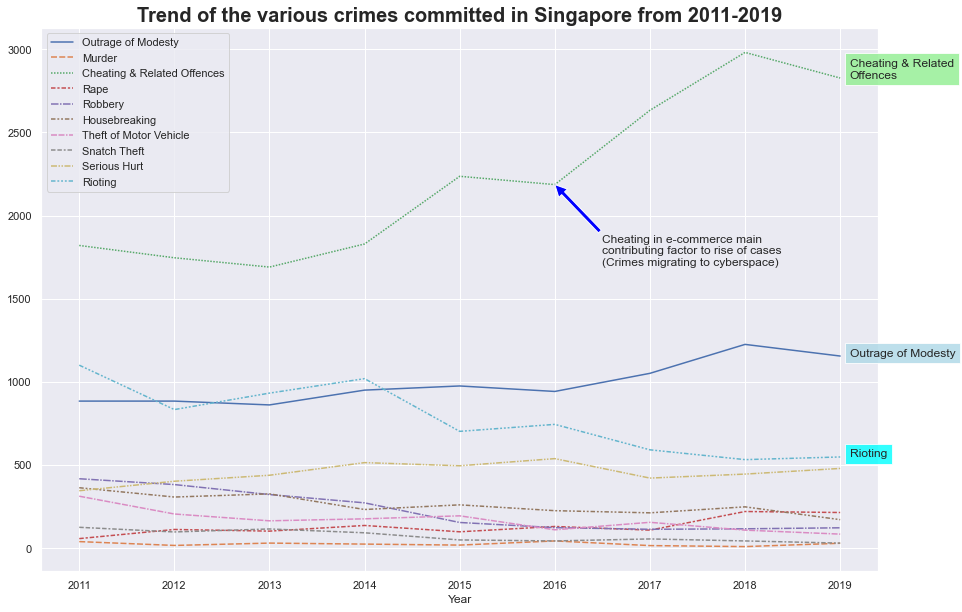

In [13]:
list_offences = [("Outrage of Modesty",om), ("Murder",murder), ("Cheating & Related Offences", cheating), ("Rape",rape), ("Robbery",robbery), ("Housebreaking",housebreaking), ("Theft of Motor Vehicle",tomv), ("Snatch Theft",snatchtheft), ("Serious Hurt",serioushurt), ("Rioting", rioting)]
count_list = []
offenceNames = []
for name, dataset in list_offences:
    dataset = dataset[['Year', 'Count']]
    dataset = dataset.set_index('Year')
    dataset = dataset.groupby('Year').sum()
    dataset = dataset.rename(columns={'Count':name})
    count_list.append(dataset)
    offenceNames.append(name)

from functools import reduce
df = reduce(lambda left,right: pd.merge(left,right,on='Year'), count_list)
print('Sum of all types of crimes committed in Singapore per year')
display(df)

ax = sns.lineplot(data=df)
plt.title("Trend of the various crimes committed in Singapore from 2011-2019", fontweight="bold", fontsize=20)

ax.annotate(f'Cheating in e-commerce main\ncontributing factor to rise of cases\n(Crimes migrating to cyberspace)', xy=(2016,2186), xytext=(2016.5,1700), arrowprops={'facecolor':'blue'})
ax.annotate(f'Cheating & Related\nOffences', xytext=(2019.1,2827), xy=(2019,2827), bbox={'facecolor':'lightgreen', 'alpha':0.8, 'pad':5})
ax.annotate(f'Outrage of Modesty', xytext=(2019.1,1155), xy=(2019,1155), bbox={'facecolor':'lightblue', 'alpha':0.8, 'pad':5})
ax.annotate(f'Rioting', xytext=(2019.1,548), xy=(2019,548), bbox={'facecolor':'aqua', 'alpha':0.8, 'pad':5})

plt.show()

As the other 7 serious offences have very low case counts, data being represented on the line plot above is not a good representation. Thus, below is the line plot for the other serious offences.

,Murder,Rape,Robbery,Housebreaking,Theft of Motor Vehicle,Snatch Theft,Serious Hurt
Year,,,,,,,
2011,39,57,417,363,312,125,345
2012,16,112,382,307,205,97,402
2013,30,102,322,326,164,115,438
2014,24,136,272,232,176,92,514
2015,18,98,154,260,194,49,495
2016,43,130,123,225,110,43,538
2017,15,108,113,212,155,55,421
2018,9,220,116,248,108,43,445
2019,29,214,122,171,84,30,479


% Change of Robbery Since 2011: -70.74%


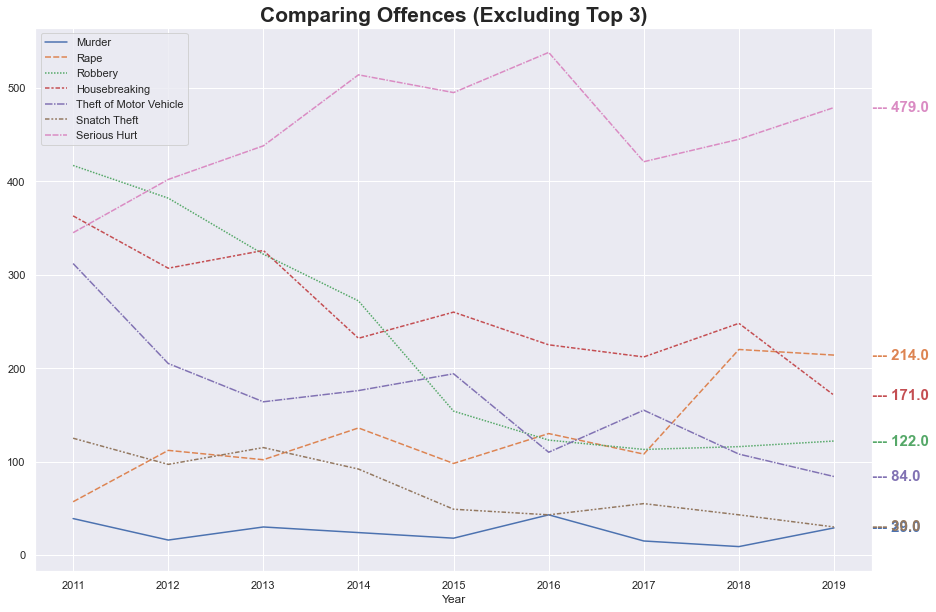

In [14]:
dfOffences = df.copy()
top3 = dfOffences.loc[:, dfOffences.columns.isin(['Rioting','Outrage of Modesty', 'Cheating & Related Offences'])]
dfOffences = dfOffences.loc[:, ~dfOffences.columns.isin(['Rioting','Outrage of Modesty', 'Cheating & Related Offences'])]
display(dfOffences)

ax = sns.lineplot(data=dfOffences)
plt.title("Comparing Offences (Excluding Top 3)", fontsize=21, fontweight="bold")
for line in ax.lines:
    y = line.get_ydata()
    if len(y) > 1:
        ax.annotate(f'--- {y[-1]}', xy=(1,y[-1]), xycoords=('axes fraction', 'data'), ha='left', va='center', color=line.get_color(), fontsize=15, fontweight="bold")

print(f'% Change of Robbery Since 2011: {round(((dfOffences["Robbery"])[[2011,2019]]).pct_change()[2019] * 100, 2)}%')

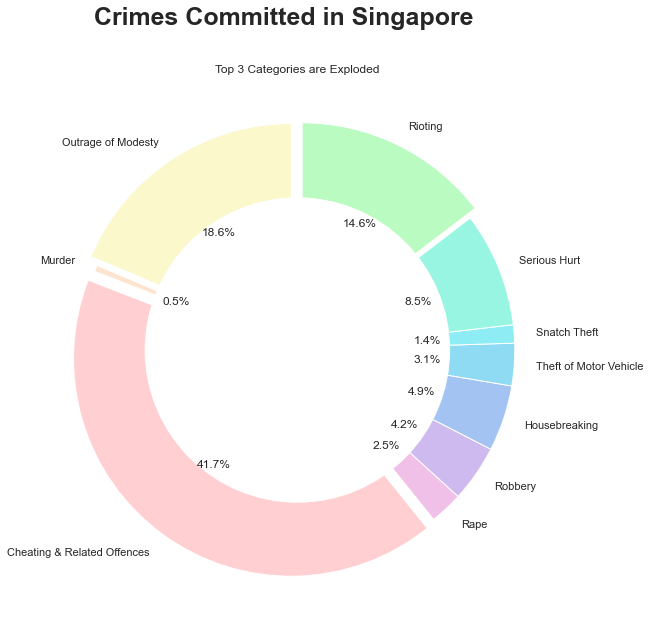

In [15]:
fig1, ax1 = plt.subplots()
ax1.pie(df.mean(), 
        labels=offenceNames, 
        colors=["#fbf8cc","#fde4cf","#ffcfd2","#f1c0e8","#cfbaf0","#a3c4f3","#90dbf4","#8eecf5","#98f5e1","#b9fbc0"],
        autopct='%1.1f%%', 
        startangle=90,
        explode=[0.05,0,0.05,0,0,0,0,0,0,0.05])
centre_circle = plt.Circle((0,0),0.70,fc='white')

fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.suptitle('Crimes Committed in Singapore', fontsize=25, fontweight="bold")
plt.title('Top 3 Categories are Exploded')
plt.show()

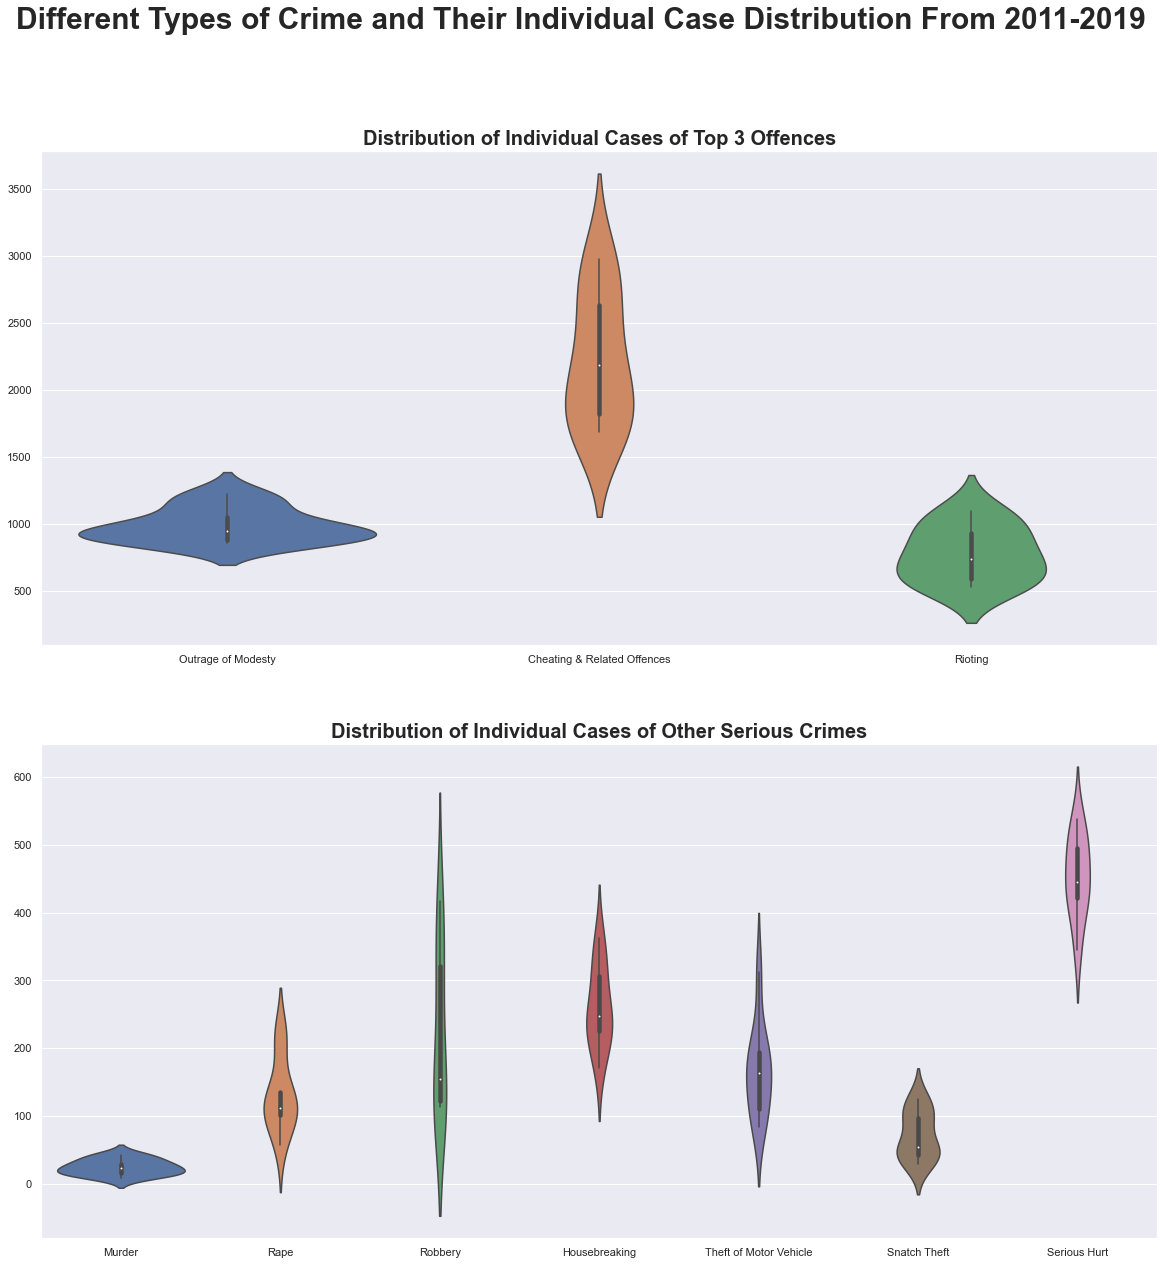

In [16]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(20,20))
sns.violinplot(data=top3, ax=ax[0])
sns.violinplot(data=dfOffences, ax=ax[1])

ax[0].set_title("Distribution of Individual Cases of Top 3 Offences", fontsize=20, fontweight="bold")
ax[1].set_title("Distribution of Individual Cases of Other Serious Crimes", fontsize=20, fontweight="bold")

plt.suptitle("Different Types of Crime and Their Individual Case Distribution From 2011-2019", fontsize=30, fontweight="bold")


plt.show()


### Insights from these boxplots:
#### From the Top 3 Serious Crime Cases:
1. They are all somewhat positively skewed
2. Cheating & Related offences have the most distribution among the top 3 due to the rising number of online scams and other related cases.

#### From the Other Serious Crime Cases:
1. Murder cases have a normal distribution over the years (consistent number of cases with very little outliers)
2. Robbery has the most distribution amongst all recorded serious crime cases. This is due to the number of robbery cases decreasing significantly over the years


### Answer to the questions: 
### - What are the various crimes in Singapore and their trend over the years?
### - Which crime is committed the most?

### Insights gained for serious offences excluding the top 3:

1. Robbery has gone down in the number of cases the most from 2011-2019 (-70.74%)
2. Cases of Serious Hurt and Rape have seen steady increase over the years
3. All other serious crime cases have seen a decrease over the years

!!! Recommendations are at the end of this section. !!!

### Insights gained:
1. There are multiple categories of crimes in Singapore:
- Outrage of Modesty
- Murder
- Cheating & Related Offences
- Rape
- Robbery
- Housebreaking
- Theft of Motor Vehicle
- Snatch Theft
- Serious Hurt
- Rioting
2. The top 3 crimes commited in Singapore from 2011-2019 are: Cheating & Related Offences, Outrage of Modesty, and Rioting (descending order)
3. Ever since 2011, the number of crimes committed under Cheating & Related Offences has gone up quite significantly. This is attributed to the number of crimes easily committed in the cyberspace via scams and phishing links. <a href="https://www.police.gov.sg/~/media/64e10b50c1ff4918908d16d09aee0e28.ashx">Reference</a>
4. The number of cases categorized under Outrage of Modesty has also increased, although not as much as the Cheating & Related Offences category.
5. The number of cases categorized under Rioting has steadily decreased over the past decade.
6. Cheating and Related Offences make up over 40% of all crime committed in Singapore, the most amongst all other serious crimes recorded.
7. Cheating & Related crime cases dominate the Singaporean crime scene, mostly due to e-commerce scams and cyber crimes that involve cheating

### Recommendations
Due to the increase in the number of e-commerce related scams and crime cases, the Singaporean government and law enforcement agencies can set up advertisement campaigns to educate and inform Singaporeans about scams, such as ways to avoid them, telltale signs, and how to report the crimes to stop them from operating. This will considerably reduce the amount of Cheating & Related offences, which make up a huge percentage of all crime cases in Singapore.

The police force needs to shift it's focus to cyber crimes, rather than on physical ones like robbery, evident from the exponential increase in cheating & related cases while the sharp decrease in the number of robbery cases.

### Section 2.1: Overall Crime Cases and Crime Rate in Singapore

This dataset shows records from 2011-2020 on the overall crime cases recorded for a specific year.

Overall crime cases reported is not equivalent to the total amount of people arrested, as a crime case does not necessarily lead to an arrest.

In [17]:
overallCrimeCases = pd.read_csv('./data/overall-crime-cases-recorded.csv', header=0)
overallCrimeCases = overallCrimeCases.rename(columns={"year":"Year", "level_1":"Description", "value": "Cases"})
print('Dataset:')
display(overallCrimeCases)

print(f'Shape of Dataset: {overallCrimeCases.shape}')

print('\nDescriptive Statistics (Cases):')
print((overallCrimeCases['Cases'].describe()).to_string())

print('\nThe Highest Recorded Number of Cases in a Year:')
print(f'{overallCrimeCases.iloc[overallCrimeCases["Cases"].idxmax()].to_string()}')

print('\nThe Lowest Recorded Number of Cases in a Year:')
print(f'{overallCrimeCases.iloc[overallCrimeCases["Cases"].idxmin()].to_string()}')

print('\nYear Range of Dataset:')
print(f'From {overallCrimeCases.Year.min()} to {overallCrimeCases.Year.max()}')

pctChange = overallCrimeCases.Cases.pct_change()

print('\nHighest Percentage Change Percentage Change:')
print(f'From {overallCrimeCases.Year[pctChange.idxmax()] - 1} to {overallCrimeCases.Year[pctChange.idxmax()]}. % Change of {round(pctChange.max() * 100, 3)}%')

print('\nLowest Negative Percentage Change Percentage Change:')
print(f'From {overallCrimeCases.Year[pctChange.idxmin()] - 1} to {overallCrimeCases.Year[pctChange.idxmin()]}. % Change of {round(pctChange.min() * 100, 3)}%')

print('\nAverage Cases for Whole Dataset:')
print(f'Average number of cases from the year 2011-2020 is {overallCrimeCases.Cases.mean()} cases per year')

Dataset:


,Year,Description,Cases
0,2011,Overall Crime Cases Recorded,31508
1,2012,Overall Crime Cases Recorded,31015
2,2013,Overall Crime Cases Recorded,29984
3,2014,Overall Crime Cases Recorded,32315
4,2015,Overall Crime Cases Recorded,33839
5,2016,Overall Crime Cases Recorded,33099
6,2017,Overall Crime Cases Recorded,32668
7,2018,Overall Crime Cases Recorded,33126
8,2019,Overall Crime Cases Recorded,35115
9,2020,Overall Crime Cases Recorded,37273


Shape of Dataset: (10, 3)

Descriptive Statistics (Cases):
count       10.000000
mean     32994.200000
std       2089.737081
min      29984.000000
25%      31709.750000
50%      32883.500000
75%      33660.750000
max      37273.000000

The Highest Recorded Number of Cases in a Year:
Year                                   2020
Description    Overall Crime Cases Recorded
Cases                                 37273

The Lowest Recorded Number of Cases in a Year:
Year                                   2013
Description    Overall Crime Cases Recorded
Cases                                 29984

Year Range of Dataset:
From 2011 to 2020

Highest Percentage Change Percentage Change:
From 2013 to 2014. % Change of 7.774%

Lowest Negative Percentage Change Percentage Change:
From 2012 to 2013. % Change of -3.324%

Average Cases for Whole Dataset:
Average number of cases from the year 2011-2020 is 32994.2 cases per year


### Section 2.2: Overall Crime Rate In Singapore

In [18]:
crimeRate = pd.read_csv("./data/overall-crime-rate.csv", header=0)
originalCrimeRate = crimeRate.copy()
print('Overall Crime Rate (Per 100,000 Population) Dataset:')
display(crimeRate)
print(f'Shape of dataset: {crimeRate.shape}')
print(f'This dataset shows records from the years {crimeRate.year.min()} to {crimeRate.year.max()}')
crimeRate = crimeRate.set_index('year')
print(f'Year with the highest crime rate is {crimeRate.value.idxmax()}, with {crimeRate.value.max()} crimes committed per 100,000 people')
print(f'Year with the lowest crime rate is {crimeRate.value.idxmin()}, with {crimeRate.value.min()} crimes committed per 100,000 people')
print(f'Average crime rate per 100,000 population in Singapore is: {crimeRate.value.mean()}')
print('\nDescriptive Statistics of Crime Rate in Singapore:')
print((crimeRate.describe()).to_string())

Overall Crime Rate (Per 100,000 Population) Dataset:


,year,level_1,value
0,2011,"Overall Crime Rate Per 100,000 Population",608
1,2012,"Overall Crime Rate Per 100,000 Population",584
2,2013,"Overall Crime Rate Per 100,000 Population",555
3,2014,"Overall Crime Rate Per 100,000 Population",591
4,2015,"Overall Crime Rate Per 100,000 Population",611
5,2016,"Overall Crime Rate Per 100,000 Population",590
6,2017,"Overall Crime Rate Per 100,000 Population",582
7,2018,"Overall Crime Rate Per 100,000 Population",587
8,2019,"Overall Crime Rate Per 100,000 Population",616
9,2020,"Overall Crime Rate Per 100,000 Population",656


Shape of dataset: (10, 3)
This dataset shows records from the years 2011 to 2020
Year with the highest crime rate is 2020, with 656 crimes committed per 100,000 people
Year with the lowest crime rate is 2013, with 555 crimes committed per 100,000 people
Average crime rate per 100,000 population in Singapore is: 598.0

Descriptive Statistics of Crime Rate in Singapore:
            value
count   10.000000
mean   598.000000
std     26.857649
min    555.000000
25%    584.750000
50%    590.500000
75%    610.250000
max    656.000000


### Section 2.3: Correlation between Overall Crime Rate and Overall Crime Cases

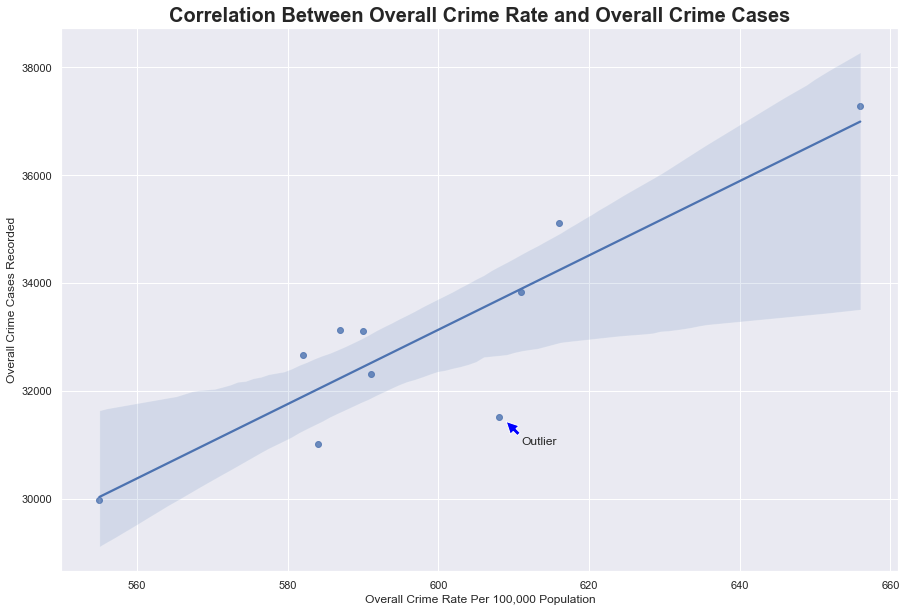

In [19]:
sns.set(rc={'figure.figsize':(15,10)})
data = pd.DataFrame(
    {"Overall Crime Rate Per 100,000 Population": crimeRate.value, 
     "Overall Crime Cases Recorded": (overallCrimeCases).set_index('Year').Cases}
)
ax = sns.regplot(data = data, x = "Overall Crime Rate Per 100,000 Population", y = "Overall Crime Cases Recorded")
plt.title("Correlation Between Overall Crime Rate and Overall Crime Cases", fontweight="bold", fontsize=20)

ax.annotate('Outlier', xy=(609,31430), xytext=(611,31000), arrowprops={'facecolor':'blue'})

plt.show()

###  Answer to the question: What is the correlation between the overall crime rate and the overall crime cases reported in Singapore?

From the scatter plot above, we can see that there is a correlation between the number of crime cases recorded and the crime rate per 100,000 population in Singapore. Although there are a few outliers that fall out of the acceptable range of the best-fit line, they are mostly borderline cases.

An exception to this would be the outlier denoted on the graph shown, where the number of crime cases reported does not strongly correlate with the crime rate of that year.

### Section 2.4: What is the trend of the crime cases recorded in Singapore?

In this section, data from the above dataset will be analysed to conclude the trend of overall crime cases in Singapore from 2011-2020.

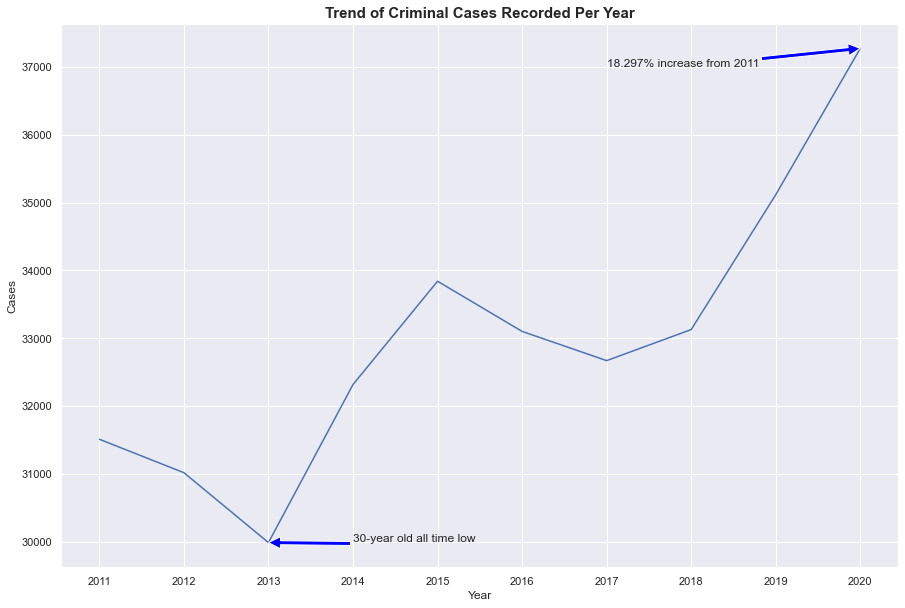

In [20]:
sns.set_style("darkgrid")
ax = sns.lineplot(data = overallCrimeCases, x = "Year", y = "Cases")
plt.title('Trend of Criminal Cases Recorded Per Year', fontweight='bold', fontsize=15)

# https://www.straitstimes.com/singapore/crime-rate-at-30-year-low-in-2013-but-cyber-crimes-on-the-rise-police-statistics
# https://www.police.gov.sg/~/media/64e10b50c1ff4918908d16d09aee0e28.ashx
ax.annotate('30-year old all time low', xy=(2013,29984), xytext=(2014,30000), arrowprops={'facecolor':'blue'})
ax.annotate(f'{round((overallCrimeCases.Cases.loc[[0,9]].pct_change())[9] * 100, 3)}% increase from 2011', xy=(2020,37273), xytext=(2017,37000), arrowprops={'facecolor':'blue'})

ax.set_xticks(np.arange(2011,2021))

plt.show()

### Answer to the question: What is the trend of the crime cases recorded in Singapore?

In [21]:
print(f"Over the years (from 2011-2020), the number of crime cases recorded in Singapore has increased, thus leading to a positive trend in the overall recorded crime cases in Singapore")
print(f"\nFrom 2011 to 2020, there has been a {round((overallCrimeCases.Cases.loc[[0,9]].pct_change())[9] * 100, 3)}% increase in the overall crime cases reported, although there was an all-time low in the crime cases recorded in the year 2013")

Over the years (from 2011-2020), the number of crime cases recorded in Singapore has increased, thus leading to a positive trend in the overall recorded crime cases in Singapore

From 2011 to 2020, there has been a 18.297% increase in the overall crime cases reported, although there was an all-time low in the crime cases recorded in the year 2013


### Insights gained from datasets in this section:
1. There has been a positive trend in the yearly crime cases recorded in Singapore (Increase in crime cases recorded)
2. There has thus been an overall increase in the crime rate in Singapore since 2011.
3. There is a strong correlation between the crime rate per 100,000 population and the number of crime cases reported.

### Recommendations
As there is an increase in both the crime rate and the number of crime cases recorded in Singapore, there can be multiple ways the Singapore Police Force can bring this figure down. The first way would be to educate Singaporeans on the crimes and the consequences that they may face if they carry them out (most effective on children and teens). Another method would be to deter crime by establishing more volunteer/neighbourhood watch patrols to ensure that the community acknowledges their presence, which deters any potential criminals from committing crimes in their neighbourhood.

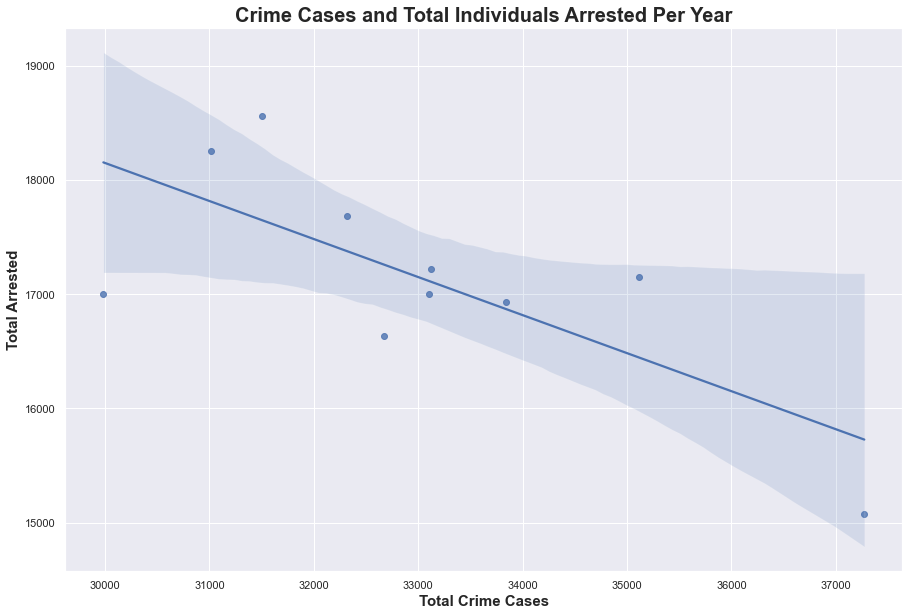

In [27]:
dataset = pd.read_csv('./data/persons-arrested-by-group.csv', header=0)
dataset = dataset.rename(columns={"level_1":"Category"})

filtered = dataset[~dataset.Category.str.contains('Old')]
total = (filtered[filtered.Category == "Total Persons Arrested"]).reset_index()
arrestedCrimeCases = overallCrimeCases.copy()[['Year', 'Cases']]

arrestedCrimeCases["Total Arrested"] = total['value']

ax = sns.regplot(data = (arrestedCrimeCases).set_index('Year'), x = 'Cases', y = "Total Arrested")
ax.set_xlabel("Total Crime Cases", fontweight="bold", fontsize=15)
ax.set_ylabel("Total Arrested", fontweight="bold", fontsize=15)

plt.title("Crime Cases and Total Individuals Arrested Per Year", fontweight="bold", fontsize=20)
plt.show()

### Insights gained and answer to question: What is the trend of the total arrested in Singapore and the total Crime Cases Recorded? Is there a relation between the two?
The overall trend from 2011-2020 of the total people arrested in Singapore is negative, while the overall trend from the same year range for the number of crime cases recorded has significantly increased. This means that even though there are more crime cases being reported, there are lesser arrests being made. This is displayed in the graph above, which shows a negative correlation between the total crime cases and the total amount of people arrested.

This is a result of the crime in Singapore migrating over to the cyber space, and criminals leveraging on the internet and technology to carry out their crimes to preserve their anonymity and make it harder for law enforcement to catch them.

### Recommendations
Ensuring that all Singaporeans are aware of how to use the internet safely is an important step to decreasing the overall likelihood of scams and online frauds from taking place. In addition, more budget can be allocated for the various cyber-crimes divisions in police departments all across Singapore to ensure that all police departments are equipped to deal and investigate these crimes.

### Section 3.1: Total Persons (local and foreigner) arrested in Singapore

This dataset shows records from 2011-2020 on the number of recorded arrests based on nationality and age group for a specific year.

In [23]:
dataset = pd.read_csv('./data/persons-arrested-by-group.csv', header=0)
dataset = dataset.rename(columns={"level_1":"Category"})

print('Dataset (head and tail of 3):')
print(f'Shape of dataset: {dataset.shape}')
print(f'Year range is from the year {dataset.year.min()} to {dataset.year.max()}')
print(f'Categories listed in dataset: {", ".join(dataset.Category.unique())}')
display((dataset.head(3)).append(dataset.tail(3)))

print('\nFiltered Dataset of persons arrested by nationality:')
# Filter based on Total, Foreginers and S'porean/PR/Stateless Arrested (set index as year)
filtered = (dataset[~dataset.Category.str.contains('Old')]).set_index('year')
total = filtered[filtered.Category == "Total Persons Arrested"].value
foreigners = filtered[filtered.Category == "Foreigners"].value
spore = filtered[filtered.Category == "Singaporeans/ Permanent Residents/ Stateless"].value

nationalityDF = pd.DataFrame({
    'Total Persons Arrested': total,
    'Foreigners Arrested': foreigners,
    'Singaporeans/PRs/Stateless Arrested':spore
})
nationalityDF['% Foreigners of Total'] = round(nationalityDF['Foreigners Arrested'] / nationalityDF['Total Persons Arrested'] * 100, 2)
nationalityDF['% Singaporeans/PR/Sateless of Total'] = round(nationalityDF['Singaporeans/PRs/Stateless Arrested'] / nationalityDF['Total Persons Arrested'] * 100, 2)
display(nationalityDF)
print(f'Highest amount of arrests made is in the year {nationalityDF["Total Persons Arrested"].idxmax()}, with {nationalityDF["Total Persons Arrested"].max()} arrests made.')
print(f'Lowest amount of arrests made is in the year {nationalityDF["Total Persons Arrested"].idxmin()}, with {nationalityDF["Total Persons Arrested"].min()} arrests made.')

print(f'\nThe average amount of people arrested from 2011-2020 is {nationalityDF["Total Persons Arrested"].mean()} people')
print(f'The average Singaporeans/ Permanent Residents/ Stateless people arrested from 2011-2020 is {nationalityDF["Singaporeans/PRs/Stateless Arrested"].mean()} people')
print(f'The average foreigners arrested from 2011-2020 is {nationalityDF["Foreigners Arrested"].mean()} people')

print(f'\nForeigners make up an average of {round(nationalityDF["% Foreigners of Total"].mean(), 2)}% of all arrests from 2011-2020')
print(f'Singaporeans/ Permanent Residents/ Stateless people make up an average of {round(nationalityDF["% Singaporeans/PR/Sateless of Total"].mean(), 2)}% from 2011-2020')

print('\nFiltered Dataset of persons arrested by age group:')
# Filtered based on age range
filtered = (dataset[dataset.Category.str.contains('Old')]).set_index('year')
youth1 = filtered[filtered.Category == "Youths (7 To 19 Years Old)"].value
youth2 = filtered[filtered.Category == "21 Years Old And Below"].value - youth1 # 19-21 Y/O
a21 = filtered[filtered.Category == "Above 21 Years Old"].value

ageGroupArrested = pd.DataFrame({
    'Total Persons Arrested': total,
    'Above 21 Years Old Arrested': a21,
    'Total Youths Arrested (7 To 21 Years Old)': filtered[filtered.Category == "21 Years Old And Below"].value,
    'Youths (7 To 19 Years Old) Arrested': youth1,
    'Youths (19 To 21 Years Old) Arrested': youth2
})
ageGroupArrested['% Above 21y/o of Total Arrested'] = round(ageGroupArrested['Above 21 Years Old Arrested'] / ageGroupArrested['Total Persons Arrested'] * 100, 2)
ageGroupArrested['% Youths Arrested of Total'] = round(ageGroupArrested['Total Youths Arrested (7 To 21 Years Old)'] / ageGroupArrested['Total Persons Arrested'] * 100, 2)
display(ageGroupArrested)
print('There are three age groups: Above 21 Years Old, Youths (7-19 Years Old), Youths (19-21 Years Old)')
print(f'\nYouths (7 To 21 Years Old) make up and average of {round(ageGroupArrested["% Youths Arrested of Total"].mean(), 2)}% arrested from the year 2011-2020')
print(f'Those above the age of 21 make up and average of {round(ageGroupArrested["% Above 21y/o of Total Arrested"].mean(), 2)}% arrested from the year 2011-2020')

print(f'\nThe most amount of youths (total) arrested is in the year of {ageGroupArrested["Total Youths Arrested (7 To 21 Years Old)"].idxmax()}, with {ageGroupArrested["Total Youths Arrested (7 To 21 Years Old)"].max()} youths (total) arrests made that year')
print(f'The least amount of youths (total) arrested is in the year of {ageGroupArrested["Total Youths Arrested (7 To 21 Years Old)"].idxmin()}, with {ageGroupArrested["Total Youths Arrested (7 To 21 Years Old)"].min()} youths (total) arrests made that year')

print(f'An average of {ageGroupArrested["Total Youths Arrested (7 To 21 Years Old)"].mean()} total youths are arrested every year (from 2011-2020)')

Dataset (head and tail of 3):
Shape of dataset: (60, 3)
Year range is from the year 2011 to 2020
Categories listed in dataset: Total Persons Arrested, Singaporeans/ Permanent Residents/ Stateless, Foreigners, Above 21 Years Old, 21 Years Old And Below, Youths (7 To 19 Years Old)


,year,Category,value
0,2011,Total Persons Arrested,18561
1,2011,Singaporeans/ Permanent Residents/ Stateless,14668
2,2011,Foreigners,3893
57,2020,Above 21 Years Old,11911
58,2020,21 Years Old And Below,3168
59,2020,Youths (7 To 19 Years Old),2422



Filtered Dataset of persons arrested by nationality:


,Total Persons Arrested,Foreigners Arrested,Singaporeans/PRs/Stateless Arrested,% Foreigners of Total,% Singaporeans/PR/Sateless of Total
year,,,,,
2011,18561,3893,14668,20.97,79.03
2012,18249,3859,14390,21.15,78.85
2013,17002,4018,12984,23.63,76.37
2014,17687,4284,13403,24.22,75.78
2015,16929,4236,12693,25.02,74.98
2016,17005,4341,12664,25.53,74.47
2017,16636,4405,12231,26.48,73.52
2018,17220,4489,12731,26.07,73.93
2019,17146,4505,12641,26.27,73.73


Highest amount of arrests made is in the year 2011, with 18561 arrests made.
Lowest amount of arrests made is in the year 2020, with 15079 arrests made.

The average amount of people arrested from 2011-2020 is 17151.4 people
The average Singaporeans/ Permanent Residents/ Stateless people arrested from 2011-2020 is 13038.6 people
The average foreigners arrested from 2011-2020 is 4112.8 people

Foreigners make up an average of 23.99% of all arrests from 2011-2020
Singaporeans/ Permanent Residents/ Stateless people make up an average of 76.01% from 2011-2020

Filtered Dataset of persons arrested by age group:


,Total Persons Arrested,Above 21 Years Old Arrested,Total Youths Arrested (7 To 21 Years Old),Youths (7 To 19 Years Old) Arrested,Youths (19 To 21 Years Old) Arrested,% Above 21y/o of Total Arrested,% Youths Arrested of Total
year,,,,,,,
2011,18561,14280,4281,3477,804,76.94,23.06
2012,18249,14105,4144,3359,785,77.29,22.71
2013,17002,13198,3804,3031,773,77.63,22.37
2014,17687,13820,3867,3120,747,78.14,21.86
2015,16929,12844,4085,3265,820,75.87,24.13
2016,17005,13420,3585,2788,797,78.92,21.08
2017,16636,13047,3589,2795,794,78.43,21.57
2018,17220,13738,3482,2703,779,79.78,20.22
2019,17146,13692,3454,2699,755,79.86,20.14


There are three age groups: Above 21 Years Old, Youths (7-19 Years Old), Youths (19-21 Years Old)

Youths (7 To 21 Years Old) make up and average of 21.81% arrested from the year 2011-2020
Those above the age of 21 make up and average of 78.19% arrested from the year 2011-2020

The most amount of youths (total) arrested is in the year of 2011, with 4281 youths (total) arrests made that year
The least amount of youths (total) arrested is in the year of 2020, with 3168 youths (total) arrests made that year
An average of 3745.9 total youths are arrested every year (from 2011-2020)


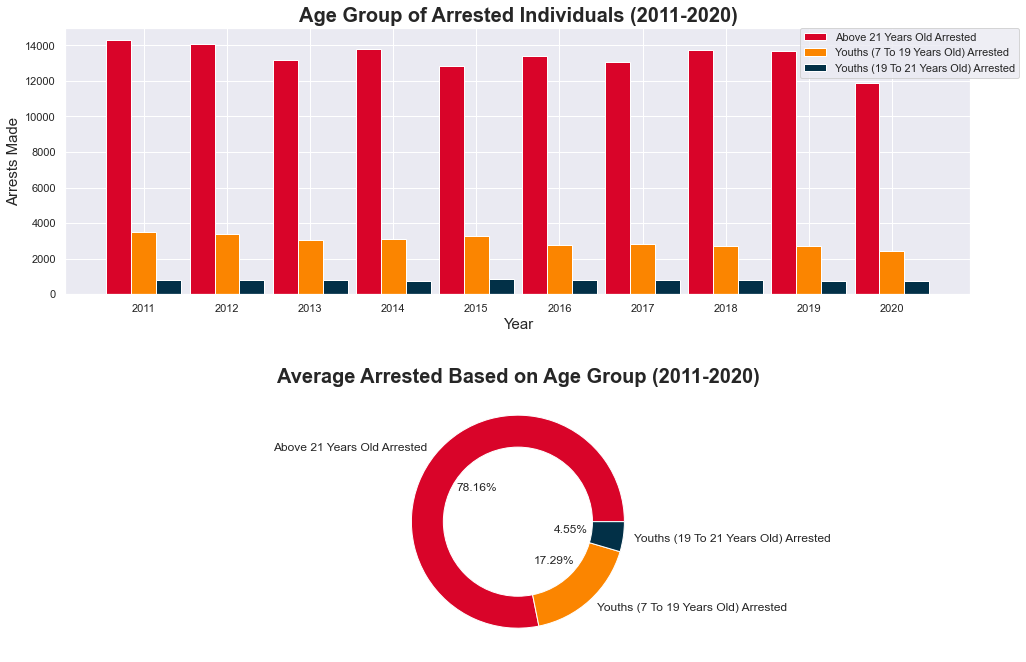

In [24]:
ageGroupArrested = ageGroupArrested.reset_index()

ageGroupArrested = ageGroupArrested[['year', 'Above 21 Years Old Arrested', 'Youths (7 To 19 Years Old) Arrested', 'Youths (19 To 21 Years Old) Arrested']]

fig, ax = plt.subplots(nrows=2, ncols=1)
w = 0.3
x = ageGroupArrested.year
ax[0].bar(x-w, ageGroupArrested['Above 21 Years Old Arrested'], width=w, color='#d90429', align='center', label="Above 21 Years Old Arrested")
ax[0].bar(x, ageGroupArrested['Youths (7 To 19 Years Old) Arrested'], width=w, color='#fb8500', align='center', label="Youths (7 To 19 Years Old) Arrested")
ax[0].bar(x+w, ageGroupArrested['Youths (19 To 21 Years Old) Arrested'], width=w, color='#023047', align='center', label="Youths (19 To 21 Years Old) Arrested")
ax[0].set_xticks(np.arange(2011,2021))


pieData = ((ageGroupArrested).set_index('year')).mean()
ax[1].set_title("Average Arrested Based on Age Group (2011-2020)", fontsize=20, fontweight='semibold')
ax[1].pie(pieData, 
        labels=['Above 21 Years Old Arrested', 'Youths (7 To 19 Years Old) Arrested', 'Youths (19 To 21 Years Old) Arrested'], 
        colors=["#d90429","#fb8500","#023047"],
        autopct='%1.2f%%', 
        pctdistance=0.5,
        textprops={'fontsize': 12})
centre_circle = plt.Circle((0,0),0.70,fc='white')

fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax[0].set_title("Age Group of Arrested Individuals (2011-2020)", fontweight="bold", fontsize=20)
ax[0].set_xlabel("Year", fontsize=15)
ax[0].set_ylabel("Arrests Made", fontsize=15)
ax[0].legend(loc='upper right', fancybox=True, bbox_to_anchor=(1.06, 1.02))
fig.tight_layout(pad=3.0)

plt.show()

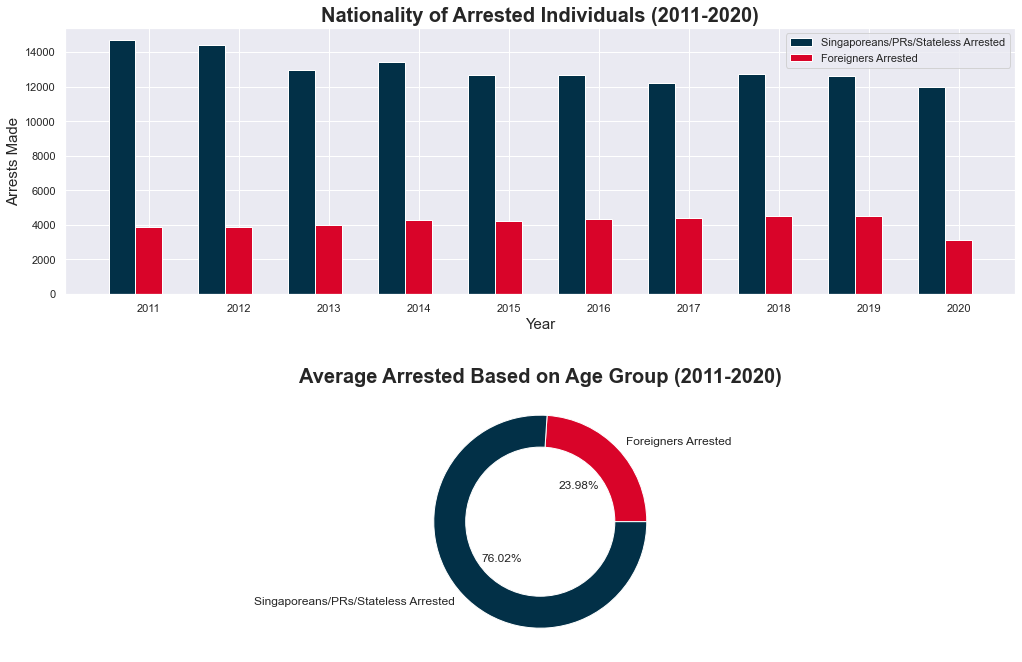

In [25]:
nationalityDF = nationalityDF.reset_index()
nationalityDF = nationalityDF[['year', 'Foreigners Arrested', 'Singaporeans/PRs/Stateless Arrested']]

fig, ax = plt.subplots(nrows=2, ncols=1)

w = 0.3
x = nationalityDF.year
ax[0].bar(x-w, nationalityDF['Singaporeans/PRs/Stateless Arrested'], width=w, color='#023047', align='center', label="Singaporeans/PRs/Stateless Arrested")
ax[0].bar(x, nationalityDF['Foreigners Arrested'], width=w, color='#d90429', align='center', label="Foreigners Arrested")
ax[0].set_xticks(np.arange(2011,2021))

ax[0].set_title("Nationality of Arrested Individuals (2011-2020)", fontweight="bold", fontsize=20)
ax[0].set_xlabel("Year", fontsize=15)
ax[0].set_ylabel("Arrests Made", fontsize=15)
ax[0].legend()

ax[1].set_title("Average Arrested Based on Age Group (2011-2020)", fontsize=20, fontweight='semibold')
ax[1].pie(((nationalityDF).set_index('year')).mean(), 
        labels=[i for i in [i for i in (nationalityDF).set_index('year')]], 
        colors=["#d90429","#023047"],
        autopct='%1.2f%%', 
        pctdistance=0.5,
        textprops={'fontsize': 12})
centre_circle = plt.Circle((0,0),0.70,fc='white')

fig = plt.gcf()
fig.gca().add_artist(centre_circle)

fig.tight_layout(pad=3.0)

plt.show()

### Insights gained from datasets:
1. Youths make up and average of 21.81% arrested from the year 2011-2020
2. Foreigners make up an average of 23.99% of all arrests from 2011-2020
3. Those aged above 21 years old are arrested the most in Singapore
4. Singaporeans/PRs/Stateless individuals are arrested the most in Singapore

### Recommendations
Advisories and notices should be broadcasted to all foreigners living or visiting Singapore on the crimes in Singapore. This will bring attention to what constitutes as a crime to ensure that there is no grey area. In addition, other recommendations such as educating the youths is also feasible to help curb the spread of crime in all communities in Singapore.

### Answer to the question: Which age and citizenship groups are arrested the most in Singapore?
The age group that are arrested in Singapore the most is those above the age of 21 years old. Though this is the case, youths that are below the age of 21 years of age account for over 21% of all arrests.

The nationality that are arrested the most are those that are Singaporeans/PRs/Stateless. Those with foreign nationalities only account for an average of 23.99% of all arrests from 2011-2020.

As the datasets are very broad in their age ranges/nationalities, it does not give very much insight on what specific age groups/nationalities are arrested the most. For example, those above the age of 21 represent a huge community within Singapore, and thus the age range is not specific enough (i.e. Age range of 10 years)

## Conclusion (Overall Insights and Recommendations)

### Answers and Questions:
<b>1. What is the trend of the crime cases recorded in Singapore?</b>

A: There has been a positive trend in the yearly crime cases recorded in Singapore (Increase in crime cases recorded)

<b>2. Which crime is committed the most?</b>

A: Cheating & Related crimes have been committed the most in Singapore.
<b>3. What are the various crimes in Singapore and their trend over the years?</b>
Various Crimes in Singapore:

<b>Outrage of Modesty</b> - Top 3 - Increased over the years

<b>Murder</b> - Not a significant increase/decrease over the years

<b>Cheating & Related Offences</b> - Top 3 - Significant increase over the years

<b>Rape</b> - Steady increase over the years 

<b>Robbery</b> - Highest percentage decrease since 2011 (over 70% decrease of robbery cases)

<b>Housebreaking</b> - Decrease over the years

<b>Theft of Motor Vehicle</b> - Decrease over the years

<b>Snatch Theft</b> - Decrease over the years

<b>Serious Hurt</b> - Steady increase over the years

<b>Rioting</b> - Top 3 - Steady decrease over the years

<b>4. Which age and citizenship groups are arrested the most in Singapore?</b>

A: Age Group: Those above the age of 21 years old have been arrested the most, while individuals who are of Singaporeans/PR/Stateless citizenship have been arrested the most.

<b>5. What is the correlation between the overall crime rate and the overall crime cases reported in Singapore?</b>

A: There is a correlation between the number of crime cases recorded and the crime rate per 100,000 population in Singapore. Although there are a few outliers that fall out of the acceptable range of the best-fit line, they are mostly borderline cases. Thus, the more the overall crime cases, the more the overall crime rate.

<b>6. What is the trend of the total arrested in Singapore and the total Crime Cases Recorded? Is there a relation between the two?</b>

The overall trend from 2011-2020 of the total people arrested in Singapore is negative, while the overall trend from the same year range for the number of crime cases recorded has significantly increased. This means that even though there are more crime cases being reported, there are lesser arrests being made. This is displayed in the graph above, which shows a negative correlation between the total crime cases and the total amount of people arrested.

### Overall Insights Gained:
<b>Overall Crime Cases and Crime Rate Dataset</b>

1. There has been a positive trend in the yearly crime cases recorded in Singapore (Increase in crime cases recorded)
2. There has thus been an overall increase in the crime rate in Singapore since 2011.
3. There is a strong correlation between the crime rate per 100,000 population and the number of crime cases reported.
4. There is a negative correlation between the amount of people arrested and the amount of crime cases reported.

<b>Persons Arrested for Selected Major Offences Dataset</b>

1. The top 3 crimes commited in Singapore from 2011-2019 are: Cheating & Related Offences, Outrage of Modesty, and Rioting (descending order)
2. Ever since 2011, the number of crimes committed under Cheating & Related Offences has gone up quite significantly. This is attributed to the number of crimes easily committed in the cyberspace via scams and phishing links. <a href="https://www.police.gov.sg/~/media/64e10b50c1ff4918908d16d09aee0e28.ashx">Reference</a>
3. The number of cases categorized under Outrage of Modesty has also increased, although not as much as the Cheating & Related Offences category.
4. The number of cases categorized under Rioting has steadily decreased over the past decade.
5. Cheating and Related Offences make up over 40% of all crime committed in Singapore, the most amongst all other serious crimes recorded.
6. Cheating & Related crime cases dominate the Singaporean crime scene, mostly due to e-commerce scams and cyber crimes that involve cheating
7. Trend of specific crime cases is answered in Question 2 of Question and Answers section

<b>Total Persons (locals and foreigners) Arrested Dataset</b>

1. Youths (7-21 years old) make up and average of 21.81% arrested from the year 2011-2020, while the rest are above the age of 21 years old.
2. Foreigners make up an average of 23.99% of all arrests from 2011-2020, while the rest are Singaporeans/PR/Stateless individuals
3. Those aged above 21 years old are arrested the most in Singapore
4. Singaporeans/PRs/Stateless individuals are arrested the most in Singapore

### Overall Recommendations:
With cheating & related crimes on the rise with no fall in sight due to criminals leveraging on technology to easily commit crimes and stay anonymous, it is important for the Singapore Police Force to shift their focus to crimes in the cyberspace <a href="https://www.police.gov.sg/~/media/64e10b50c1ff4918908d16d09aee0e28.ashx">Reference</a>. To that end, the police force needs to buff up their cyber-crimes department to investigate, identify, and arrest individuals who commit these crimes.

With that being said, education of youths and adults alike on the telltale signs of scams can also help Singaporeans to remain aware of what they click or what information they share online to avoid falling for a scam. 

To ensure that all foreigners and Singaporeans alike are aware of the crimes and their punishments, advisories and/or warnings can help to inform the public on the laws of Singapore to ensure that there is no mistaking of what is illegal. In addition, the police force can also set up more patrols or increase their spending in neighbourhood watches to deter crime, as the presence of these patrols can easily deter crimes such as robberies and rioting, the latter of which is one of the top 3 crimes committed in Singapore.